<center><font size="+4">Programming and Data Analytics 1 2021/2022</font></center>
<center><font size="+2">Sant'Anna School of Advanced Studies, Pisa, Italy</font></center>
<center><img src="https://github.com/EMbeDS-education/StatsAndComputing20212022/raw/main/PDA/jupyter/jupyterNotebooks/images/SSSA.png" width="700" alt="EMbeDS"></center>

<center><font size="+2">Course responsible</font></center>
<center><font size="+2">Andrea Vandin a.vandin@santannapisa.it</font></center>

<center><font size="+2">Co-lecturer </font></center>
<center><font size="+2">Daniele Licari d.licari@santannapisa.it</font></center>

---

<center><font size="+4">Lecture 7: Course closing and</font></center>
<center><font size="+4"> Advanced Libraries for</font></center>
<center><font size="+4">data manipulation/visualization</font></center>
<center><font size="+4">Overview of NumPy & Pandas</font></center>

---

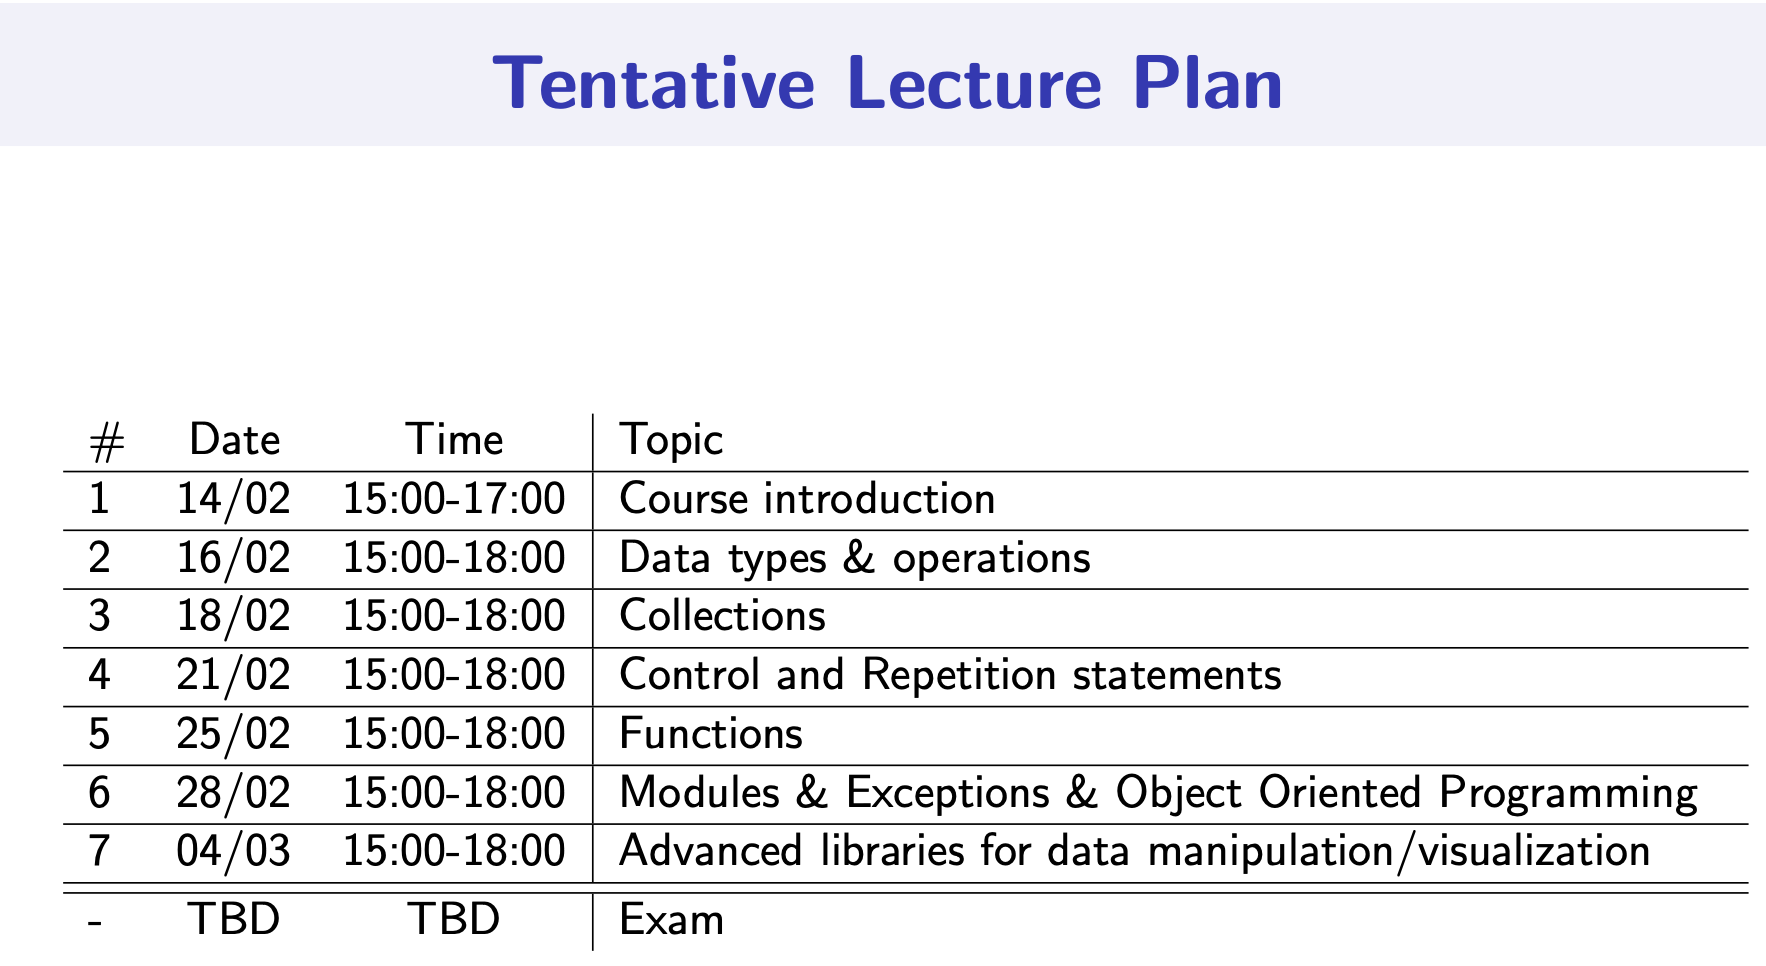

In [2]:
from IPython.display import Image, display
img=Image(filename='images/tentativeLecturePlan.png',width=800)
display(img)

# Notes and references about this class

## The role of this class in the course

So far we focused on 
* How to program 
  * _Well_
  * Using the built-in Python data structures and functionalities
  * We have also seen some __best practices__ to follow when using python
    - Take a look at [this page](https://realpython.com/python-pep8/) for further __best practices__
* Applying the studied topics in 
  * simple assignments and 
  * in more advanced applications seen in class
    * Class 3: A first taste of plots
    * Class 4: Load, process and plot official Italian COVID19 data
    * Class 5: Load, process and plot simulated data from epidemiological SIR models
    * Class 5: Creation of word clouds for online news related to a given topic
    * Class 6: Creation and analysis of economical Agent-based models using OOP

The idea is that
  * Before knowing how to use advanced Python features, you need to know 
    - how to program
    - how to program in Python    
  * This is a more organic learning approach than showing how to solve specific tasks A or B
    * in the future you will have to learn how to solve new specific tasks... 
  * Now you have the necessary background to learn 
    - how to use __advanced libraries__ (to get more efficiency and/or to consider bigger problems)
        * Often it is just a matter of changing the command used, but the logics stays the same
    - __new programming languages__

__Today we will give an overview of advanced Python libraries for data processing.__
* Of course, we won't be able to fully present you these libraries in a few hours
  * We want to pass you the message: 'certain tasks can be done more easily/efficiently using specific libraries'
  * You can see this notebook as a first place to look at if you will need to use such libraries in the future.
    * It also contains examples and references to further material
  * __This will not be part of the exam__

__On the 22nd of March__ will start __IPDP Module 2__
  * 10 hours
  * We will start from here, and will present you the main steps in __Machine Learning__ pipelines
    * with focus on pre-processing of data
  * In case you are interested, consider attending it now or in the coming years

## What is this class about

This notebook is mainly based on Chapter 4 of the following book:
* [Python for Data Analysis, 2nd edition, William Wesley McKinney (O’Reilly)](https://www.oreilly.com/library/view/python-for-data/9781491957653/)
* [Freely available Jupyter notebooks covering the examples/material of each chapter](https://github.com/wesm/pydata-book)
* Some pictures have been taken from these sources

In particular, this notebook introduces the libraries:
* [NumPy](https://numpy.org/): for scientific computing
* [Pandas](https://pandas.pydata.org/): 
   * for working with structured data (CSV, Spreadsheets, Databases)
   * for creating advanced plots

> Note: in this notebook we will often refer interchangeably to _arrays_, _NumPy arrays_ or just _ndarrays_. 
<br/>
> You can think of __arrays as lists with better performances__ for numerical computing

# NumPy
NumPy, _Numerical Python_, is the Python package for __scientific computing__

It provides:
* An efficient implementation for list-like multidimensional data structures named __NumPy arrays__ or __ndarray__
  * including functions for performing
    * element-wise computations on arrays 
    * mathematical operations between arrays
* Tools for reading/writing datasets from/to disk and arrays
* Linear algebra operations, Fourier transform, and random number generation
* 1-line plotting functionalities
* Tools for integrating C, C++, and Fortran code with Python
  * Useful to use legacy code
  * Useful to use very efficient and established libraries for scientifical computation


NumPy arrays are a more efficient way of storing and manipulating data than the other built-in Python data structures.

## Install and import the NumPy module
The first time you run this notebook you might have to install Pandas using the following script:

In [ ]:
import sys
!{sys.executable} -m pip install numpy
#!{sys.executable} -m pip install --upgrade pip

The Python community has adopted a number of __naming conventions__ for commonly used modules:
* Below you see the conventions for numpy, pandas and matplotlib

In [2]:
import numpy as np
# import pandas as pd 
# import matplotlib.pyplot as plt

* This means that when you see `np.arange(4)`, we refer to `numpy.arange(4)`, the `arange` function in NumPy.

## Main features: Arrays, Vectorized Computation, Broadcast

Numpy provides:
* __ndarray__, a multidimensional array providing **vectorized arithmetic** operations and **broadcasting** capabilities
   * Vectorized arithmetic operations: 
     - Operations on arrays are done iterating over the elements of the arrays at C level rather than at Python level, obtaining better performances. 
     - The syntax is more concise
   * [Broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html): 
     - In certain cases, operations on arrays can be done even if they do not have same dimensions. Pyhton tries to guess what to do
     - E.g., if you multiply an array by a constant, each entry of the arrays is multiplied by the constant
       - the constant is `broadcasted` on each entry of the array
     - No data is 'needlessly' copied, and the _iterations to broadcast_  are done at C level, obtaining better performances
* Standard mathematical functions for applying operations on entire arrays without having to write loops
  - Again, these guarantee C-level performances

Let's create a ndarray and a built-in Python list, each with 5mln elements.

In [3]:
import numpy as np
np_arr = np.arange(5000000) #5 mln
py_list = list(range(5000000)) #5 mln

print('np_arr has type',type(np_arr))
print('py_list has type',type(py_list))

np_arr has type <class 'numpy.ndarray'>
py_list has type <class 'list'>


**Performance comparison among  Numpy ndarrays and Python lists**
* Let's compute the square value of each element in the array/list

In [4]:
 print("Test NumPy Array")
 %time np_arr_power = np_arr ** 2

 print("\nTest Python list comprehension")
 %time py_list = [x ** 2 for x in py_list]

 print("\nTest Python list iteration")
 %time for i in range(len(py_list)): py_list[i]=py_list[i]**2

 print("\nTests completed")

Test NumPy Array
CPU times: user 17.1 ms, sys: 49 ms, total: 66.1 ms
Wall time: 95.9 ms

Test Python list comprehension
CPU times: user 2.17 s, sys: 308 ms, total: 2.48 s
Wall time: 4.46 s

Test Python list iteration
CPU times: user 3.26 s, sys: 113 ms, total: 3.38 s
Wall time: 4.85 s

Tests completed


## The NumPy ndarray: A Multidimensional Array

### What is an ndarray?

NumPy arrays are named **nd**array because they are **n**-**d**imensional arrays

In [5]:
import numpy as np
# Generate a 2x3 matrix with random data
data = np.random.randn(2, 3)
data

array([[ 0.84896928, -0.36714405,  0.210829  ],
       [-0.05445361,  0.94963609,  1.24118073]])

Arrays enable you to perform
mathematical operations on each of their elements 
* using a syntax similar to the equivalent operations between (scalar) numbers

Below we 
* multiply by 10 **each value** in `data`
* double **each value** in `data`

In [6]:
data * 10

array([[ 8.48969279, -3.67144055,  2.10828996],
       [-0.54453609,  9.49636094, 12.41180726]])

In [7]:
data + data

array([[ 1.69793856, -0.73428811,  0.42165799],
       [-0.10890722,  1.89927219,  2.48236145]])

A difference between Python lists and arrays
* lists can contain elements of **different type**
* arrays have to contain only elements of **same type**

Every array has 
* a`shape`, a tuple indicating the size of each dimension, 
  * `data.shape` is `(2,3)` because it has dimension 2x3
* a `dtype`, an object describing the type of the data in the array
  * `data.dtype` is `float64` because it contains floating point numbers (reals)
  *  Note that `float64` is a [data type defined in NumPy](https://numpy.org/doc/stable/user/basics.types.html). _More on this later_

In [8]:
print(data.shape)
print(data.dtype)

(2, 3)
float64


### Creating ndarrays
The easiest way to create an array is to use the `array` function. 
* This will produce a new array containing the passed data

In [9]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
print(arr1)
print(arr1.shape)
print(arr1.dtype)

[6.  7.5 8.  0.  1. ]
(5,)
float64


List of lists, e.g. representing a matrix,
* can be converted into a multidimensional array 
* if internal lists have same length

In [10]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
print('data2\n',data2)
arr2 = np.array(data2)
print('arr2\n',arr2)
print(arr2.shape)
print(arr2.dtype)

data2
 [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2
 [[1 2 3 4]
 [5 6 7 8]]
(2, 4)
int64


Further functions for creating new arrays:
* `zeros` and `ones` create arrays of 0’s or 1’s, respectively, with a given length or shape.
* To create a higher dimensional array with these methods, pass a tuple for the shape:

In [11]:
print('np.zeros(10) =', np.zeros(10))
print('np.ones((3, 6)) =\n', np.ones((3, 6)))

np.zeros(10) = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
np.ones((3, 6)) =
 [[1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]]


`arange` is an array-valued version of the built-in Python `range` function:
* It allows to represent an open interval [start,stop,step)
    - where only stop is mandatory.
    - note, `stop` does not belong to the range
* Beware to what you do: 
  - `range` is an iterator that creates elements on demand
  - `arange` fully creates the array allocating all the necessary space

In [12]:
print(np.arange(15))  #if you want integers
print(np.arange(15.)) #if you want reals
print(type(np.arange(15)))

print(range(15))
print(type(range(15)))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]
<class 'numpy.ndarray'>
range(0, 15)
<class 'range'>


### Data Types for ndarrays
The names of the numerical dtypes follow this convention: 
* A type name, like `float` or `int`, followed by the number of bits used to represent an element of this type.
* The higher is this number of bits, 
  * the higher precision (or the larger interval) you can use to store your data (GOOD)
  * the more memory is required to store your data (BAD)

For example, 
* a double-precision floating point value takes 64 bits (`float64`)
* an integer might take 32 (`int32`) or 64 bits (`int64`)
  * in the latter case being able to represent a larger interval of integers, but using up more space

In [13]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)
print(arr1.dtype)
print(arr2.dtype)

float64
int32


You can explicitly convert or cast an array from one dtype to another using ndarray’s `astype` method
* This will create a `copy` of the original array, where elements have the new type

In [14]:
arr = np.array([1.1, 2.1, 3.1, 4.1, 5.1])
print(arr)
print('Before',arr.dtype,'\n')
int_arr = arr.astype(np.int32)
print(int_arr)
print('After ',int_arr.dtype)

[1.1 2.1 3.1 4.1 5.1]
Before float64 

[1 2 3 4 5]
After  int32


### Vectorized Arithmetics with NumPy Arrays

Once you have values in an array
* You can easily apply operations on each of its elements
  * Arithmetic operations between equal-size arrays are applied element-wise
  * Arithmetic operations between an array and a scalar (a number):
    * the operation is applied between each array element and the scalar
    * the scalar is said to be _broadcasted_ to all the array elements
* Similarly to list comprehensions, this does not require loops,
  * Note: as shown above, vectorized arithmetics is more efficient than the corresponding list comprehension operation (even more if compared to loops)

In [15]:
a = np.array([[1., 2., 3.], [4., 5., 6.]])
print('a = \n',a, '\n')
print('a * a = \n', a * a, '\n')
print('a - a = \n', a - a, '\n')
print('1 / a = \n', 1 / a, '\n')
print('a*0.5  \n=', a*0.5, '\n')
print('a**0.5  \n=', a**0.5, '\n')

a = 
 [[1. 2. 3.]
 [4. 5. 6.]] 

a * a = 
 [[ 1.  4.  9.]
 [16. 25. 36.]] 

a - a = 
 [[0. 0. 0.]
 [0. 0. 0.]] 

1 / a = 
 [[1.         0.5        0.33333333]
 [0.25       0.2        0.16666667]] 

a*0.5  
= [[0.5 1.  1.5]
 [2.  2.5 3. ]] 

a**0.5  
= [[1.         1.41421356 1.73205081]
 [2.         2.23606798 2.44948974]] 



> Note that with `a * a` we do not compute the product of 2 matrices. 
> - We multiply them element-wise

### Basic Indexing and Slicing

#### Indexing and slicing 1-dimensional arrays

Arrays inherit `indexing` and `slicing` capabilities of __lists__

In [16]:
arr = np.arange(10)
print('arr',arr)
print('You can indexsingle entries:\narr[0] is',arr[0])
print('arr[5] is',arr[5])

arr [0 1 2 3 4 5 6 7 8 9]
You can indexsingle entries:
arr[0] is 0
arr[5] is 5


In [17]:
print('arr\n',arr)
print('You can create slices:')
print('arr[:8]  is\n',arr[:8])
print('arr[5:]  is\n          ',arr[5:])
print('arr[5:8] is\n          ',arr[5:8])

arr
 [0 1 2 3 4 5 6 7 8 9]
You can create slices:
arr[:8]  is
 [0 1 2 3 4 5 6 7]
arr[5:]  is
           [5 6 7 8 9]
arr[5:8] is
           [5 6 7]


A slice is a sort of `view` of the array
* You can assign it to a variable
* You can change its values
* **Beware**: no data is copied

In [19]:
arr[5:8] = 12
print('After arr[5:8] = 12 arr is\n',arr)

After arr[5:8] = 12 arr is
 [ 0  1  2  3  4 12 12 12  8  9]


Note: 
* if you assign a scalar value to a __slice__ (a selection of some elements in an array)
  * as in `arr[5:8] = 12`
* then the value is propagated (or again _broadcasted_) to each selected element 

If you are familiar with Python lists you might have noticed an important difference
* When slicing a list, you actually create a copy 
* **Array slices are views on the original array**.
* The __data in a slice is not copied__
  * this is more efficient
  * and any modifications to the view will be reflected in the source array
  
Let's see another example  

In [20]:
print('source array', arr)
arr_slice = arr[5:8]
print('slice array', arr_slice)

source array [ 0  1  2  3  4 12 12 12  8  9]
slice array [12 12 12]


In [21]:
arr_slice[1] = 12345
print('source array (after arr_slice[1] = 12345):\n', arr)

source array (after arr_slice[1] = 12345):
 [    0     1     2     3     4    12 12345    12     8     9]


If you want a `copy of a slice of an ndarray` instead of a view, you will need to `explicitly copy` the array; 
* `arr2 = arr[5:8].copy()`

#### Indexing and slicing higher-dimensional arrays

With higher dimensional arrays, you have many more options. 
* A two-dimensional array is actually an array of arrays
  * Each entry of the _outer_ array contains an _inner_ array

In [24]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [29]:
arr1d=arr2d[0]
arr1d

array([1, 2, 3])

In [30]:
arr1d[2]

3

As for multidimensional lists, you can access single elements of inner arrays using nested `[]`
* `arr2d[0][2]` is `3`, the third element (index `2`) of the first inner array (index `0`)
* Alternatively, you can do `arr2d[0,2]`

In [31]:
print(arr2d)
print(arr2d[0][2])
print(arr2d[0, 2])

[[1 2 3]
 [4 5 6]
 [7 8 9]]
3
3


**See figure below for an illustration of indexing a 2D array** <br />
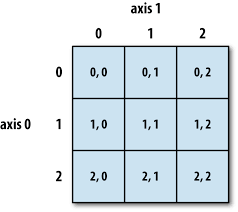

This is an example for 2-dimensional arrays
* It works the similarly for higher dimensions...

**BEWARE**
- When `indexing`, it does not make a difference whether you use
  - `arr2d[0][2]` or `arr2d[0, 2]`
- When `silicing`, it makes a **big difference** whether you use
  - `arr2d[:2,1:]` or `arr2d[:2][1:]`
  - Typically what you want to do is `arr2d[:2,1:]`

For `arr2d[:2,1:]`
- we first select the rows 0 and 1 `[1,2,3],[4,5,6]`
- from these, we select column 1 and 2 `[2,3],[5,6]`

In [32]:
print(arr2d[:2,1:])
arr2d[:2,1:].shape

[[2 3]
 [5 6]]


(2, 2)

For `arr2d[:2][1:]`
- we first select the rows 0 and 1 `[1,2,3],[4,5,6]`
- we select row 1 `[4, 5, 6]`

In [ ]:
print(arr2d[:2])
print()
print(arr2d[:2][1:])
arr2d[:2][1:].shape

Further examples of indexing/slicing of higher dimensional arrays

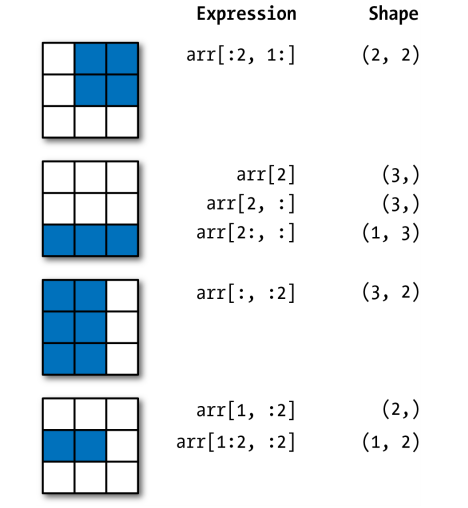

In [ ]:
print(arr2d)
print()
print(arr2d[:2])

We have sliced it along axis 0, the first axis (the rows). 
* A slice, therefore, selects a range of elements along an axis. 
* You can pass multiple slices just like you can pass multiple indexes

In [ ]:
arr2d[:2, 1:]

Assigning to a slice expression assigns to the whole selection by broadcasting

In [ ]:
arr2d[:2, 1:] = 0 
arr2d

We can also use a Boolean expression to select elements in an array
* we select the ones satisfying the Boolean expression

In [34]:
data = np.random.randn(7, 4)
print('Data\n',data)

Data
 [[ 0.66502282 -0.98843963 -1.4959361   0.34142948]
 [ 0.80147968  0.86193157  0.58601916 -0.77774987]
 [-0.95992072  0.6950296   0.01025182  0.19535505]
 [-0.23199767  1.61894178  0.56806972 -0.0762036 ]
 [ 2.12022764 -0.54727147  1.57134972 -1.44838772]
 [-1.65768881 -0.24023032 -0.82843227 -0.1842721 ]
 [ 0.14127952 -0.39654394  0.11284299  0.22720162]]


In [36]:
data > 0

array([[ True, False, False,  True],
       [ True,  True,  True, False],
       [False,  True,  True,  True],
       [False,  True,  True, False],
       [ True, False,  True, False],
       [False, False, False, False],
       [ True, False,  True,  True]])

In [37]:
data2=data[ data > 0]
print('Data2\n',data2)

Data2
 [0.66502282 0.34142948 0.80147968 0.86193157 0.58601916 0.6950296
 0.01025182 0.19535505 1.61894178 0.56806972 2.12022764 1.57134972
 0.14127952 0.11284299 0.22720162]


## Mathematical and Statistical Methods
Arrays have a number of methods for 
* computing mathematical functions/statistics 
  * on the entire array 
  * on part of the array

### Reshaping an array

Arrays have a convenient method `reshape` to 
* change their dimensions without modifying the data
* Also in this case we compute views. 
  * **no data is actually copied**
  * any change to the view is observed also in the orginal data

For example, we can transform
* a 1-dimensional array with 15 entries
* into a 2-dimensional 3x5 array (a matrix)

In [38]:
arr = np.arange(15)
print("1-dimensional array arr\n",arr)
m=arr.reshape((3, 5))
print("2-dimensional matrix m\n",m)

print()
#m is a view!
m[0,0]=100
print("1-dimensional array arr after modifiyng the view m\n",arr)
print("2-dimensional matrix m after modifiyng the view m\n",m)

1-dimensional array arr
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
2-dimensional matrix m
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]

1-dimensional array arr after modifiyng the view m
 [100   1   2   3   4   5   6   7   8   9  10  11  12  13  14]
2-dimensional matrix m after modifiyng the view m
 [[100   1   2   3   4]
 [  5   6   7   8   9]
 [ 10  11  12  13  14]]


### Transposing Arrays
Arrays have the transpose method and also the special T attribute
* This is just a special reshape
* we compute a view - no actual copy

In [ ]:
arr = np.arange(15)
m = arr.reshape(3,5)
print("Matrix m\n",m)
print()
print("Transposed matrix using T\n",m.T)
print()
print("Transposed matrix transpose()\n",m.transpose())

When invoked on a matrix, they both give the transpose of such matrix
- See animation from [wikipedia](https://en.wikipedia.org/wiki/Transpose)

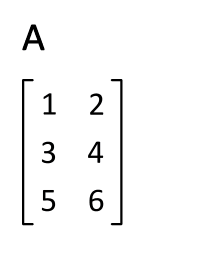

In [39]:
from IPython.display import Image
Image("https://upload.wikimedia.org/wikipedia/commons/e/e4/Matrix_transpose.gif")

In addition, `transpose` can be invoked on arrays of any dimensions [to permute such dimensions](https://numpy.org/devdocs/reference/generated/numpy.transpose.html#numpy.transpose)
- reversing them by default
- or providing the new order for dimensions in input

In [40]:
x = np.ones((2, 3, 4))
print(x)
print('Shape of x\n',x.shape)
print('Shape of x.transpose()\n',x.transpose().shape)
print('Shape of x.transpose(0,2,1)\n',x.transpose(0,2,1).shape)

[[[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]]
Shape of x
 (2, 3, 4)
Shape of x.transpose()
 (4, 3, 2)
Shape of x.transpose(0,2,1)
 (2, 4, 3)


### Matrix product
If you want to [multply two matrices](https://en.wikipedia.org/wiki/Matrix_multiplication) you can use the `dot` method
* not just multiplying element-wise their elements
* but the classic row-column multiplication of matrixes

In [41]:
m1 = np.arange(4).reshape(2,2)
m2 = (np.arange(4)+4).reshape(2,2)
#np.dot(m.T,m)
print('m1\n',m1)
print('m2\n',m2)
print('m1.dot(m2)\n',m1.dot(m2))
print('Same as np.dot(m1,m2)\n',np.dot(m1,m2))

m1
 [[0 1]
 [2 3]]
m2
 [[4 5]
 [6 7]]
m1.dot(m2)
 [[ 6  7]
 [26 31]]
Same as np.dot(m1,m2)
 [[ 6  7]
 [26 31]]


### Square root
_np.sqrt()_ computes the square root of each element. Equivalent to m1 ** 0.5

In [42]:
print(np.sqrt(m1))
print(m1 ** 0.5)

[[0.         1.        ]
 [1.41421356 1.73205081]]
[[0.         1.        ]
 [1.41421356 1.73205081]]


### Aggregations
Aggregations (often called reductions) 
* like sum, mean, and standard deviation std of all elements in the matrix/array 
* can be computed by using the corresponding array method

In [43]:
print('matrix\n',m)
print('mean',m.mean())
print('sum',m.sum())
print('standard deviation',m.std())

print()
print('array\n',arr)
print('mean',arr.mean())
print('sum',arr.sum())
print('standard deviation',arr.std())

matrix
 [[100   1   2   3   4]
 [  5   6   7   8   9]
 [ 10  11  12  13  14]]
mean 13.666666666666666
sum 205
standard deviation 23.399905033045656

array
 [100   1   2   3   4   5   6   7   8   9  10  11  12  13  14]
mean 13.666666666666666
sum 205
standard deviation 23.399905033045656


Functions like `sum`  and `mean`
* can be computed for each dimension rather than cumulatively 
* we do this specifying the `axis` (the dimension) over which we want to iterate

For example, using 
* `axis=0` we compute the sum/mean/std for each column of M
* `axis=1` we compute the sum/mean/std for each row of M

In [44]:
print('matrix\n',m)
print()

print('sum of each column\n',m.sum(axis=0))
print('mean of each column\n',m.mean(axis=0))
print('standard deviation of each column\n',m.std(axis=0))
print()

print('sum of each row\n',m.sum(axis=1))
print('mean of each row\n',m.mean(axis=1))
print('standard deviation of each row\n',m.std(axis=1))

matrix
 [[100   1   2   3   4]
 [  5   6   7   8   9]
 [ 10  11  12  13  14]]

sum of each column
 [115  18  21  24  27]
mean of each column
 [38.33333333  6.          7.          8.          9.        ]
standard deviation of each column
 [43.65266951  4.0824829   4.0824829   4.0824829   4.0824829 ]

sum of each row
 [110  35  60]
mean of each row
 [22.  7. 12.]
standard deviation of each row
 [39.01281841  1.41421356  1.41421356]


### Sorting
Similarly to lists, 
* arrays can be sorted using the `sort()` method

In [45]:
arr = np.random.randn(8)
arr

array([-0.18601845, -0.66099602,  1.70994868,  1.40675889,  0.79324982,
       -1.10668442,  0.13217969, -2.00609159])

In [46]:
arr.sort()
arr

array([-2.00609159, -1.10668442, -0.66099602, -0.18601845,  0.13217969,
        0.79324982,  1.40675889,  1.70994868])

Multidimensional arrays are sorted by iteratively sorting each dimentsion. 
E.g. in matrices we 
* Sort the elements within each row
* We sort the rows using the lexicographical order

In [47]:
arr2d = np.random.randn(5, 3)
arr2d

array([[ 0.40650375, -2.7057371 , -0.5029306 ],
       [ 1.35012108, -0.63537223, -0.56251132],
       [ 0.6257213 , -0.68324308,  2.34994859],
       [ 0.56593321, -0.26606417, -1.18505741],
       [-0.01546255, -0.07518233, -0.57586539]])

In [48]:
arr2d.sort()
arr2d

array([[-2.7057371 , -0.5029306 ,  0.40650375],
       [-0.63537223, -0.56251132,  1.35012108],
       [-0.68324308,  0.6257213 ,  2.34994859],
       [-1.18505741, -0.26606417,  0.56593321],
       [-0.57586539, -0.07518233, -0.01546255]])

But we can also sort single dimensions

In [57]:
arr2d = np.random.randn(5, 3)
arr2d_cp0 = arr2d.copy()
arr2d_cp1 = arr2d.copy()
print(arr2d)

#Same the elements within each row (sort across columns)
arr2d.sort()
print('arr2d.sort()')
print(arr2d)

#Same the elements within each column (sort across rows)
arr2d_cp0.sort(0)
print('arr2d.sort(0)')
print(arr2d_cp0)

#Same as sort()
arr2d_cp1.sort(1)
print('arr2d.sort(1)')
print(arr2d_cp1)

[[-1.08686122 -0.77297586 -0.49687874]
 [-1.10277136 -1.29104409  1.15193949]
 [-0.64795549  0.2473714   0.06462606]
 [-0.19628872 -0.73598625 -0.08708252]
 [ 1.37278937 -0.07368236  0.34446672]]
arr2d.sort()
[[-1.08686122 -0.77297586 -0.49687874]
 [-1.29104409 -1.10277136  1.15193949]
 [-0.64795549  0.06462606  0.2473714 ]
 [-0.73598625 -0.19628872 -0.08708252]
 [-0.07368236  0.34446672  1.37278937]]
arr2d.sort(0)
[[-1.10277136 -1.29104409 -0.49687874]
 [-1.08686122 -0.77297586 -0.08708252]
 [-0.64795549 -0.73598625  0.06462606]
 [-0.19628872 -0.07368236  0.34446672]
 [ 1.37278937  0.2473714   1.15193949]]
arr2d.sort(1)
[[-1.08686122 -0.77297586 -0.49687874]
 [-1.29104409 -1.10277136  1.15193949]
 [-0.64795549  0.06462606  0.2473714 ]
 [-0.73598625 -0.19628872 -0.08708252]
 [-0.07368236  0.34446672  1.37278937]]


### Unique
NumPy has some basic set operations for 1-dimensional ndarrays. 
* The most common one is `np.unique()` 
  * returns the sorted unique values in an array

In [51]:
names = np.array(['Bob', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
print(np.unique(names))

# pure Python alternative:
# sorted(set(names))

['Bob' 'Joe' 'Will']


## Logic functions 
- See also [here](https://numpy.org/doc/stable/reference/routines.logic.html)

We have seen how conditions can be checked on all elements in an array
- containing an array of same dimensions containing 
  - `True` for the elements satisfying the condition
  - `False` for the elements not satisfying the condition  

In [52]:
data = np.random.randn(7, 4)
data

array([[ 2.21945459,  1.01437897, -1.09167698,  0.41223462],
       [ 0.37335886,  0.01196188, -0.14419247,  1.03282337],
       [-1.01110561, -1.37280142, -0.86931111,  0.16920005],
       [ 0.56260591,  1.2578433 , -0.47116591, -1.14309699],
       [ 1.74180918, -0.25533748,  1.35858207, -0.33889684],
       [-1.13026036, -0.81875934,  0.40839643, -0.15765653],
       [ 0.5647346 ,  3.4617304 , -0.00783177,  1.22387044]])

What numbers are greater than 0?

In [53]:
mask = data > 0
mask

array([[ True,  True, False,  True],
       [ True,  True, False,  True],
       [False, False, False,  True],
       [ True,  True, False, False],
       [ True, False,  True, False],
       [False, False,  True, False],
       [ True,  True, False,  True]])

NumPy offers __logic functions__ to check Boolean expressions on such Boolean arrays
- `any`: a generalization of **OR** returning `True` if at least one entry contains `True` 
- `all`: a generalization of **AND** returning `True` if at least one entry contains `True` 

As for the aggregation functions, these can be checked also on single dimensions

In [54]:
print(mask)
print()
print()

# any( axis)
# Test whether any array element along a given axis evaluates to True.
print('\nmask.any()\n', mask.any() )
print('\nmask.any(axis=0) - for each column\n', mask.any(axis=0) )
print('\nmask.any(axis=1) - for each row\n', mask.any(axis=1) )
#all(axis)

print()
print()
#Test whether all array elements along a given axis evaluate to True.
print('\nmask.all()\n', mask.all() )
print('\nmask.all(axis=0) - for each column\n', mask.all(axis=0) )
print('\nmask.all(axis=1) - for each row\n', mask.all(axis=1) )

[[ True  True False  True]
 [ True  True False  True]
 [False False False  True]
 [ True  True False False]
 [ True False  True False]
 [False False  True False]
 [ True  True False  True]]



mask.any()
 True

mask.any(axis=0) - for each column
 [ True  True  True  True]

mask.any(axis=1) - for each row
 [ True  True  True  True  True  True  True]



mask.all()
 False

mask.all(axis=0) - for each column
 [False False False False]

mask.all(axis=1) - for each row
 [False False False False False False False]


# Pandas

[Pandas](https://pandas.pydata.org/) is another popular Python package. 
* It is built on top of NumPy (its data structures consist of several arrays)

Pandas provides rich data structures and functions designed to 
* make it easy, flexible and efficient working with structured data 
  - CSV files
  - Spreadsheets
  - Databases

E.g., Pandas allows to easily perform complex data manipulation like 
* _reshape_ and _slice_
* data aggregations 
* data selection
* merge/join tables

## Install and import the Pandas module

The first time you run this notebook you might have to install Pandas using the following script:

In [ ]:
import sys
!{sys.executable} -m pip install pandas

The Python community has adopted a number of __naming conventions__ for commonly used modules:
* Below you see the conventions for numpy, pandas and matplotlib

In [58]:
#import numpy as np
import pandas as pd 
# import matplotlib.pyplot as plt

## Series

A Series is a one-dimensional list-like/array-like object containing __2 arrays__
* an ndarray containing the __actual data__
* an associated ndarray of __labels__ with one label (or index) per data element

Intuitively, you can see a Series as 
* a dictionary (a hash-map)
* or, in its simplest form, as a 1-dimensional array/list consisting of
  * an array of data, 
  * an implicit array of labels. It labels each element with its position

In [ ]:
obj = pd.Series([4, 7, -5, 3])
obj

We note that 
* The string representation of a Series shows the index on the left and the values on the right
  * Obtained using the method `__str__` of the class Series


Since we did not specify an index
* a default array of labels containing integers from 0 to N - 1 is created.
* each element is labeled with its own position in the array

If you are interested only in one of the two arrays, just use

In [ ]:
print('Series index: ',obj.index)
print('Series values: ',obj.values)

Let's now create a Series whose entries are labelled by characters.

In [ ]:
obj2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
obj2

### Indexing, selection, and filtering

Similarly to Python [**dict**ionaries](https://docs.python.org/3/tutorial/datastructures.html), 
* you can use values in the index to select values in the main array

In [ ]:
print("obj2['d'] = \n",obj2['d'])

obj2['d'] = 6
print("obj2['d']  (after obj2['d'] = 6) =\n",obj2['d'])

print('\nYou can also select a number of entries')
print("obj2[['c', 'a', 'd']] =")
print(obj2[['c', 'a', 'd']])

Indexes are preserved by NumPy array operations like
* filtering with a boolean array, scalar multiplication, application of math functions

In [ ]:
print("obj2")
print(obj2)
print()
print("NumPy operation obj2[obj2 > 0]")
print(obj2[obj2 > 0])
print()
print("NumPy operation obj2 * 2")
print(obj2 * 2)
print()
print("NumPy operation np.exp(obj2)")
print(np.exp(obj2))

What do you get with `obj2 > 0`?
- a copy of the series preserving the index, with `True`/`False` values

In [ ]:
obj2 > 0

You can create a Series using 
- a **dict**ionary 
- and a list as index

The list contains the keys of interest from the dictionary

In [ ]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj4 = pd.Series(sdata, index=states)
obj4 

We note that
* 3 values found in sdata were placed in the appropriate locations, 
* but since no value for `'California'` was found, it got a `NaN` (not a number) 
  * which is considered in pandas to mark missing/NA/NaN values
  
The `isnull` and `notnull` functions in pandas detect such missing values:

In [ ]:
pd.isnull(obj4) 

In [ ]:
pd.notnull(obj4) 

E.g., if you want to use only the non-null values you do:

In [ ]:
obj4[pd.notnull(obj4)]

## DataFrame
* A Series can be seen as 
  - a table with 1 column
  - a csv file with 1 column
  - ...
* A **DataFrame is a proper table/csv** with more columns
  * A series is just a simpler version of a dataframe
  * A dataframe is a series with **more main arrays** (one per column), and **one index**
  * DataFrames are the most important objects in pandas

### Creating DataFrame objects

The most common way to build a dataframe is by 
* using a dict containing lists or arrays of same length
  * each key/label becomes a column
    * if you specify a subset of key/labels, then only the corresponding column will be added
    * if you pass a column that isn’t contained in data, it will get NA values
  * each list/array element is a value for that column

In [ ]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

In [ ]:
frame = pd.DataFrame(data,columns=['state','pop','nonExistingColumn'])
frame

In [ ]:
frame = pd.DataFrame(data)
frame

We see above that the DataFrame also has an index/labels array
* the first column
  * in this case we have the default array of labels
  * but specific ones can be given explicitly

In [ ]:
frame1 = pd.DataFrame(data, index = ['a','b','c','d','e','f'] )
frame1

A column of a DataFrame can be retrieved as a Series 
* by dict-like notation 
* or by attribute:

In [ ]:
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'], 
                      index=['one', 'two', 'three', 'four', 'five','six'])
frame2

In [ ]:
#Select single column or sequence of columns from the DataFrame
frame2['state'] # by dict-like notation 

In [ ]:
frame2.state # by attribute

> Note the difference
> - `['state']` vs `.state`
<br/>
> They are both valid

If you create a dataframe using a 2-levels nested dictionary
* The keys of the outer dictionary will be used for the column names
* The keys of the inner dictionary will be used for the index names

In [ ]:
inner_dict1 ={           2001: 2.4, 2002: 2.9}
inner_dict2 ={2000: 1.5, 2001: 1.7, 2002: 3.6}

outer_dict = {'Nevada': inner_dict1, 'Ohio': inner_dict2}
frame3 = pd.DataFrame(outer_dict)
frame3

You can also choose which keys of the inner dict (i.e. which indexes) to use
* we are not using 2001 and 2000
* we are using a non-existing index 2003

In [ ]:
pd.DataFrame(outer_dict, index=[2002, 2003])

Like Series, the `values` attribute 
- returns the data contained in the DataFrame as a 2D ndarray

In [ ]:
frame3.values

### Updating DataFrame objects

Values in a dataframe column can be modified by assignment. 
* If we assign a single value to a column, then the value is __broadcasted__ to the whole column
* E.g., the empty `debt` column can be initialized to 16.5 as:

In [ ]:
frame2

In [ ]:
frame2['debt'] = 16.5
frame2

In [ ]:
frame2.debt=1.0
frame2

When assigning lists or arrays to a column, 
- they must contain as many elements as rows in the DataFrame

In [ ]:
frame2['debt'] = np.arange(6.)
print(frame2)
#The following would not work
#frame2['debt'] = np.arange(6)
frame2.dtypes

Creating and deleting columns
* Assigning a column that doesn’t exist will create a new column. 
* The del keyword will delete columns as with a dict

In [ ]:
frame2

In [ ]:
frame2['eastern'] =  (frame2.state == 'Ohio')
#frame2['eastern'] = True
frame2

> Note, you **cannot** create columns using the attribute notation
> * `frame2.easterntwo =  (frame2.state == 'Ohio')`

Deleting columns and rows
- `del` modifies the dataframe on which it is applied
- [`drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) has a number of useful attributes
  - can be used to delete columns or rows
  - creates a copy by default, but can also act on the current one

In [ ]:
del frame2['eastern']
frame2

In [ ]:
frame2['new_col']=np.arange(6)
print('frame2')
print(frame2)

frame2del = frame2.drop(['new_col'],axis=1)
print('\nframe2del')
print(frame2del)
print('\nframe2')
print(frame2)

> Drop can modify the current DataFrame if setting `inplace=True`

In [ ]:
frame2['new_col']=np.arange(6)
frame2
print('frame2')
print(frame2)

frame2.drop(['new_col'],axis=1,inplace=True)
print('\nframe2')
print(frame2)

In [ ]:
#You get error
#frame2.drop(['new_col'],axis=1,inplace=True)

In [ ]:
#frame2.drop(['new_col'],axis=1,inplace=True) #deleting a non existing column gives errors
frame2.drop(['new_col'],axis=1,inplace=True,errors='ignore') #you can ignore errors

We have just seen how to __delete columns__

In order to __delete rows__ 
* you just use the `drop` method without specifying the `axis` (or using `axis=0`)

In [ ]:
frame2

In [ ]:
frame100 = frame2.drop(['five'])
frame100

In [ ]:
frame100['year']=100
frame100

In [ ]:
frame100.drop(['four','three'],inplace=True)
frame100

In [ ]:
frame2

Similarly to multi-dimensional arrays, 
* you can **transpose** the result:

In [ ]:
frame2.T

In [ ]:
frame2.transpose()

As for array, no data is actually copied when transposing
* unless you specify it with attribute **copy**

> BEWARE: A copy will be always created if the dataframe contains __mixed dtypes__

In [ ]:
#Given that we have strings, integers and flaots, a copy is done no matter what
frame2T=frame2.transpose(copy=False)
frame2.year=frame2.year-100
print(frame2)
print()
print(frame2T)

In [ ]:
frame2=frame2.astype({'year': 'float64'})
frame2.dtypes

In [ ]:
frame2.drop(['state'],axis=1,inplace=True)
frame2

In [ ]:
frame2.dtypes

We now have just floats. 
- Therefore a copy will be created only if required

In [ ]:
frame2T=frame2.transpose(copy=False)
frame2.year=frame2.year-100
print(frame2)
print()
print(frame2T)

### Indexing, selection, and filtering


Indexing into a DataFrame 
- allows to retriving one or more of its columns:

In [ ]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

In [ ]:
data['two'] #retrieving one column

In [ ]:
data[['three', 'one']] #retrieving two columns

> If you select by slicing or Boolean expression, 
> - it is interpreted as a selection on __rows__

In [ ]:
data[:2] #rows by slicing 

In [ ]:
data[ data['three'] > 5 ]  #rows by a boolean array

#### 'Better' selection using iloc and loc

The `iloc` field of dataframes allows to select subsets of rows and columns using NumPy-like notation
* The iloc indexer for Pandas Dataframe is used for integer-location based indexing / selection by position.
* `data.iloc[row selection, column selection]`
   - column selection is optional
   - **a bit like selections with 2-dimensional arrays seen before**

In [ ]:
data

In [ ]:
data.iloc[1]   # second row

In [ ]:
data.iloc[-1]  # last row

In [ ]:
data.iloc[:,1] # first column

In [ ]:
data.iloc[:,-1] # last column

In [ ]:
data

Multiple row and column selections using iloc
- all rows   , first two columns, 
- last 2 rows, first two columns, 

In [ ]:
data.iloc[:, :2] # all rows, first 2 columns

In [ ]:
data.iloc[2:, :2] # rows 2,3, first 2 columns

In [ ]:
data.iloc[[1, 2], [3, 0, 1]] # 2nd 3rd row,  4th 1st 2nd columns.

The `loc` indexer works similarly
* but you use column/index names rather than positions
    - Selecting rows by label/index
    - Selecting rows with a boolean / conditional lookup
* The loc indexer is used with the same syntax as iloc: `data.loc[row selection, column selection]`

> * `loc` gets rows (and/or columns) with particular **labels**
> * `iloc` gets rows (and/or columns) at integer **locations**

In [ ]:
print(data)
print()
print(data.loc[['Colorado','Ohio']]) #List of labels index.
print()
print(data.loc[:,'one']) # first column of data frame
print()

# Multiple row and column selections using loc and DataFrame
print(data.loc[['Colorado','Ohio'], ['one','four']])  # 'Colorado','Ohio' row + 'one','four'columns.

In [ ]:
data

In [ ]:
data.loc['Colorado':'New York', 'two':]

### Arithmetics and Data Alignment
When summing 2 dataframes with different sets of indexes we get a dataframe where 
* either only entries with column-index in both dataframes exist (default)
* all entries with column-index in at least one dataframe exist (`fill_value=0`)

This is known as __data alignment__

#### column-index must exist in both dataframes

In [ ]:
df1 = pd.DataFrame(np.arange(4.).reshape((2, 2)), 
                   columns=list('ab'),
                   index=['Texas', 'Colorado'])
df1

In [ ]:
df2 = pd.DataFrame((np.arange(3.)+4).reshape((1, 3)), 
                   columns=list('abc'),
                   index=['Texas'])
df2

In [ ]:
df1 + df2

#### column-index must exist in one dataframe

If you want to see **Colorado** in the result
- You can fill a **default value**

In [ ]:
df1.add(df2, fill_value=0)

In [ ]:
df1.add(df2, fill_value=100)

> `Colorado,c` remains NA because it does not appear in any dataframe

### NumyPy & function application and mapping

#### A digression on `lambda` functions

__[Lambda functions](https://www.w3schools.com/python/python_lambda.asp)__: in some cases, it might be convenient to define on-the-fly anonymous simple functions
* __anonymous__: the function has no name
* __simple__: the function can consist only of one expression

A lambda function computes the sum of two numbers: 
- `lambda a, b: a+b`

Recall:
- Everything in python is an object, also (lambda) functions
  - You can assign them to variables
  - You can pass them as parameters

In [ ]:
my_lfun = lambda a, b: a+b
print(type(my_lfun))
my_lfun(1,2)

In [ ]:
def expression_evaluator(f,n1,n2):
    print('The result is',f(n1,n2))

expression_evaluator(lambda a, b: a+b, 1,2)
expression_evaluator(lambda a, b: a*b, 1,2)

A lambda function is really nothing more than a simple function without name
* Why should we use them then?
* Due to syntactic limiations regarding `def`

There are places where `def` cannot be used:
* In arguments of functions or in return statements

Lambda expressions can help you avoiding annoying workarounds
* In the end, it is mostly syntactic sugar

An interesing feature related to lambda functions are
- Python closurses to *attach data to code*

In [ ]:
# Python closures and lambda expressions
#    We attach data to code
def myfunc(n):
    return lambda a : a * n

mydoubler = myfunc(2)
mytripler = myfunc(3)

print(mydoubler(11))
print(mytripler(11))

In [ ]:
#This cannot be done
# def myfunc(n):
#   return def aaa(a) :
#             a * n            

However you can do

In [ ]:
def myfunc(n):
    def myinnerfunc(a) : 
        return a * n
    return myinnerfunc

mydoubler2 = myfunc(2)
mytripler2 = myfunc(3)

print(mydoubler(11))
print(mytripler(11))

Lambda functions are typically used in conjunction with
* __map__: applies a given function to each element in a sequence
* __filter__: applies a Boolean function to each element in a sequence, and returns only those evaluated to `true`
* __reduce__: applies cumulatively a given function to the elements in a sequence, and return the cumulative result

Some examples and interesting discussions on lambdas, map, filter, and reduce can be found at:
* [Reference 1](https://book.pythontips.com/en/latest/map_filter.html#map-filter-and-reduce)
* [Reference 2](https://www.learnpython.org/en/Map,_Filter,_Reduce)

Here we see how lambda functions allow to 
- _enrich_ the set of functions applicable to DataFrames
- apply _compactly_ complex functions to DataFrames

#### Function application and mapping
NumPy [ufuncs](https://www.w3schools.com/python/numpy_ufunc.asp) 
- element-wise array functions
- work fine also with pandas objects

In [ ]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

In [ ]:
np.abs(frame)

But you can also apply any function thought for 1d arrays to each column or row.

In [ ]:
my_abs = lambda arr: arr.abs()
frame.apply(my_abs)

In [ ]:
f = lambda arr: arr.abs() * 2
frame.apply(f)

In [ ]:
f = lambda arr: arr.max()
frame.apply(f)

In [ ]:
frame.apply(f, axis='columns')

Element-wise Python functions can be used as well
- [`applymap`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.applymap.html) applies a function that accepts and returns a scalar to every element of a DataFrame
- `map` can be used to obtain same result for series

In [ ]:
frame

In [ ]:
times_ten = lambda x: x*10
frame.applymap(times_ten)

In [ ]:
frame['e'].map(times_ten)

### Sorting
To sort
lexicographically by row or column index, use the `sort_index` method, 
- which returns a new, sorted object:

In [ ]:
obj = pd.Series(range(4), index=['d', 'a', 'b', 'c'])
obj

In [ ]:
obj.sort_index()

In [ ]:
frame = pd.DataFrame(np.arange(9).reshape((3, 3)),
                     index=['three', 'two','one'],
                     columns=['c', 'a', 'b'])
frame

In [ ]:
frame.sort_index() # sorting by the index

In [ ]:
frame.sort_index(axis=1,ascending=False) #  sorting  by column index  in descending order

We saw how to sort according to the 'name' of the index or of the column

If you want to **sort according to the values** in the dataframe you should use
- [sort_values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)

In [ ]:
frame

In [ ]:
frame.sort_values(by='b',ascending=False)

### Summarizing and Computing Descriptive Statistics
Series and Dataframes offer methods for computing mathematical/statistical methods. 
* Most of these are reductions or summary statistics, 
  * methods that compute
    * For Series: a single value (e.g. sum or mean) 
    * For DataFrames: a Series of values from the rows or columns. 

In [ ]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                   [np.nan, np.nan], [0.75, -1.3]],
                  index=['a', 'b', 'c', 'd'],
                  columns=['one', 'two'])
df

In [ ]:
df.sum(axis='columns')

In [ ]:
df.sum()

Note that NaN are ignored
* `9.25/3 = 3.083333`

In [ ]:
df.mean()

idxmin and idxmax, return 
* the index containing the minimum or maximum values

In [ ]:
df

In [ ]:
df.idxmax()

In [ ]:
df.idxmin()

The method `describe` computes a number of summary statistics in one shot:

In [ ]:
df.describe() #Compute set of summary statistics for Series or each DataFrame column

 ### Value Counts, Membership and Missing Data
 Another class of related methods extracts information about the values contained in a
one-dimensional Series. 

In [ ]:
df = pd.DataFrame([['a', 'b'], [np.nan, 'a'],
                   ['b', 'b'], ['a', 'b']],
                  index=[1,2,3,4],
                  columns=['one', 'two'])

df

In [ ]:
df.two.unique() # unique, which gives you an array of the unique values in a Series

In [ ]:
df.two.value_counts() # computes a Series containing value frequencies:

`isin` is responsible for 
- vectorized set membership 

In [ ]:
df.one

In [ ]:
df.one[df.one.isin(['b', 'a'])]

In [ ]:
df.one[df.one.isin(['b'])]

In certain cases, you might want to **filter out missing data**
- You can use [`dropna`](https://www.w3resource.com/pandas/dataframe/dataframe-dropna.php) to drop rows with at least one NAN
- Or columns with at least one NAN using `dropna(axis='columns')`

In [ ]:
df

In [ ]:
df.dropna()

In [ ]:
df.dropna(axis='columns')

### Concatenate, Merge, Join
Sometimes we don't have just 1 dataframe, 
- but more that we want to combine in different ways

Pandas provides various facilities for easily combining together DataFrames

#### Concatenating Along an Axis
If we have dataframes representing _chunks_ of data with same structure 
- e.g., sets of rows of a table
- we can use `concat` to concatenate their rows
  - many more options [exist](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html).

In [ ]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                    index=[0, 1, 2, 3])
 
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                    index=[4, 5, 6, 7])


df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                    index=[8, 9, 10, 11])
 

frames = [df1, df2, df3]

result = pd.concat(frames, axis=0)
result

Note, you might need to sort the resulting dataframe

In [ ]:
frames = [df2, df1, df3]

result = pd.concat(frames, axis=0)
result

In [ ]:
result.sort_index()

What if some rows have same index?
- You get more rows with same index! 

In [ ]:
frames = [df2, df2]
result = pd.concat(frames, axis=0)
result

In [ ]:
result.loc[4]

If you want to avoid this:
- Reset the index afterwards `result.reset_index()`
- Change the index of one of the two before concatenating

But, in general, we suggest to use conact only if this case does not arise.
> Indeed, it is useful to split first a big dtaframe, working on the single parts and putting them back together

Thanks to __data alignment__, you can also concatenate dataframe with 
- __not perfectly matching structure__

In [ ]:
df2['E']= ['E8', 'E9', 'E10', 'E11']
df2.drop(['D'],axis=1,inplace=True)
print('df2\n',df2)

frames = [df1, df2, df3]

result = pd.concat(frames, axis=0)
result

#### Database-style merging and joining

Dimensions in combining dataframes
- `concat` combines dataframes _vertically_
   - we put together _rows_
   - but we can also add columns specifying `axis`
- [`merge` and `join`](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html) combine dataframes _horizontally_
   - we put together _columns_   
   
Some examples below were taken from [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)

##### Merge

`Merge` operations combine datasets by 
- Linking rows using one or more keys (i.e. columns).
- These operations are central to relational databases. 
  - After all, dataframes are tables ...

Let's look at an example of `merge`

In [ ]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})


right = pd.DataFrame({'key': ['K0', 'K0', 'K2', 'K2'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})
left

In [ ]:
right

We want to obtain a dataframe with columns `key` and `A` to `D`, combining rows 
- with same value of `key`

In [ ]:
pd.merge(left, right,  how='inner', on='key')

In [ ]:
pd.merge(left, right,  how='outer', on='key')

In [ ]:
pd.merge(left, right,  how='left', on='key')

- The _how_ argument determines which keys are to be included in the resulting table

|  Merge method |Description  |
|---|---|
|  left |  Use keys from left frame only |  
|  right |  Use keys from right frame only |  
|  outer |  Use union of keys from both frames |  
|  inner (default) | Use intersection of keys from both frames  |  


Instead, _on_ specifies the Column to join on. 
- This must appear in both combined DataFrames

What if you want to ignore certain columns? 

In [ ]:
pd.merge(left, right,  how='inner', on='key')

In [ ]:
right

In [ ]:
pd.merge(left, right[['key','C']],  how='inner', on='key')

##### Join

Pandas exposes another method for applying merge-like operations
- **join**

Both `merge` and `join` are based on a common inner method.
- join could be useful in [specific cases](https://stackoverflow.com/questions/22676081/what-is-the-difference-between-join-and-merge-in-pandas)

# Simple application to Italian COVID data - load/manipulate remote CSV file

In [59]:
import pandas as pd 

Using Python and pandas, it is easy to read data from text files

One convenient feature is __type inference__
* You don’t need to specify which columns are numeric, integer, boolean, or string. 
* Handling dates and other custom types requires a bit more effort, though. 

Let us consider the national-level Italian COVID CSV data collected by Protezione civile
* It is distributed as a CSV file in a [GitHub repository](https://github.com/pcm-dpc/COVID-19/)
* You also find a local copy downloaded on 26/01/2021 in our wiki (follow the link dataset from the right-menu)

Let's read one such _remote_ CSV file into a DataFrame
* __You just need 1 instruction__

In [60]:
#Load delimited data from a file, URL, or file-like object. Use comma as default delimiter
covid_data = pd.read_csv('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv')

In [61]:
covid_data.head()

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,...,tamponi,casi_testati,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido
0,2020-02-24T18:00:00,ITA,101,26,127,94,221,0,221,1,...,4324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-25T18:00:00,ITA,114,35,150,162,311,90,93,1,...,8623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-26T18:00:00,ITA,128,36,164,221,385,74,78,3,...,9587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-27T18:00:00,ITA,248,56,304,284,588,203,250,45,...,12014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-28T18:00:00,ITA,345,64,409,412,821,233,238,46,...,15695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
covid_data.tail()

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,...,tamponi,casi_testati,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido
377,2021-03-07T17:00:00,ITA,21144,2605,23749,449113,472862,7050,20765,2494839,...,42342845,20375964.0,NaN,161.0,NaN,NaN,3002580.0,64906.0,36013136.0,6329709.0
378,2021-03-08T17:00:00,ITA,21831,2700,24531,448002,472533,-329,13902,2508732,...,42527529,20435513.0,NaN,231.0,NaN,NaN,3015474.0,65894.0,36115564.0,6411965.0
379,2021-03-09T17:00:00,ITA,22393,2756,25149,453734,478883,6350,19749,2521731,...,42873501,20543816.0,NaN,278.0,NaN,NaN,3032381.0,68712.0,36292531.0,6580970.0
380,2021-03-10T17:00:00,ITA,22882,2827,25709,461365,487074,8191,22409,2535483,...,43234541,20664762.0,NaN,253.0,NaN,NaN,3052141.0,71227.0,36494453.0,6740088.0
381,2021-03-11T17:00:00,ITA,23247,2859,26106,471244,497350,10276,25673,2550483,...,43606758,20793180.0,NaN,266.0,NaN,NaN,3074409.0,74608.0,36702922.0,6903836.0


In [63]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   data                                    382 non-null    object 
 1   stato                                   382 non-null    object 
 2   ricoverati_con_sintomi                  382 non-null    int64  
 3   terapia_intensiva                       382 non-null    int64  
 4   totale_ospedalizzati                    382 non-null    int64  
 5   isolamento_domiciliare                  382 non-null    int64  
 6   totale_positivi                         382 non-null    int64  
 7   variazione_totale_positivi              382 non-null    int64  
 8   nuovi_positivi                          382 non-null    int64  
 9   dimessi_guariti                         382 non-null    int64  
 10  deceduti                                382 non-null    int64 

In [64]:
covid_data['data']

0      2020-02-24T18:00:00
1      2020-02-25T18:00:00
2      2020-02-26T18:00:00
3      2020-02-27T18:00:00
4      2020-02-28T18:00:00
              ...         
377    2021-03-07T17:00:00
378    2021-03-08T17:00:00
379    2021-03-09T17:00:00
380    2021-03-10T17:00:00
381    2021-03-11T17:00:00
Name: data, Length: 382, dtype: object

In [66]:
covid_data.data

0      2020-02-24T18:00:00
1      2020-02-25T18:00:00
2      2020-02-26T18:00:00
3      2020-02-27T18:00:00
4      2020-02-28T18:00:00
              ...         
377    2021-03-07T17:00:00
378    2021-03-08T17:00:00
379    2021-03-09T17:00:00
380    2021-03-10T17:00:00
381    2021-03-11T17:00:00
Name: data, Length: 382, dtype: object

In [69]:
covid_data.iloc[0]

data                                      2020-02-24T18:00:00
stato                                                     ITA
ricoverati_con_sintomi                                    101
terapia_intensiva                                          26
totale_ospedalizzati                                      127
isolamento_domiciliare                                     94
totale_positivi                                           221
variazione_totale_positivi                                  0
nuovi_positivi                                            221
dimessi_guariti                                             1
deceduti                                                    7
casi_da_sospetto_diagnostico                              NaN
casi_da_screening                                         NaN
totale_casi                                               229
tamponi                                                  4324
casi_testati                                              NaN
note    

In [70]:
covid_data.iloc[-1]

data                                      2021-03-11T17:00:00
stato                                                     ITA
ricoverati_con_sintomi                                  23247
terapia_intensiva                                        2859
totale_ospedalizzati                                    26106
isolamento_domiciliare                                 471244
totale_positivi                                        497350
variazione_totale_positivi                              10276
nuovi_positivi                                          25673
dimessi_guariti                                       2550483
deceduti                                               101184
casi_da_sospetto_diagnostico                              NaN
casi_da_screening                                         NaN
totale_casi                                           3149017
tamponi                                              43606758
casi_testati                                      2.07932e+07
note    

In [71]:
#Get the last day in the CSV file
last_day = covid_data['data'].iloc[-1]
last_day

'2021-03-11T17:00:00'

Using DataFrame’s to_csv method, we can write the data out to a comma-separated file
* Let's create a CSV file containing only the data about the latest day

In [72]:
print(covid_data.data == last_day) # Evaluates to True for the rows that satisfy this guard
cov_regions_last_day = covid_data[covid_data.data == last_day] # Get all the rows that satisfy the guard above
cov_regions_last_day

0      False
1      False
2      False
3      False
4      False
       ...  
377    False
378    False
379    False
380    False
381     True
Name: data, Length: 382, dtype: bool


,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,...,tamponi,casi_testati,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido
381,2021-03-11T17:00:00,ITA,23247,2859,26106,471244,497350,10276,25673,2550483,...,43606758,20793180.0,NaN,266.0,NaN,NaN,3074409.0,74608.0,36702922.0,6903836.0


In [73]:
cov_regions_last_day.to_csv('covid_lastday.csv')

Or, more compactly

In [74]:
covid_data[covid_data.data == covid_data['data'].iloc[-1]].to_csv('covid_lastday_b.csv')

In [76]:
covid_data[covid_data['ricoverati_con_sintomi'] > 10000].to_csv('covid_more_than_10k.csv')

In [77]:
covid_data[covid_data['ricoverati_con_sintomi'] > 25000].to_csv('covid_more_than_25k.csv')

# Simple application to Yahoo! Finance stock prices - %change, correlation
Let’s consider some DataFrames of stock prices obtained from
Yahoo! Finance:

In [78]:
# install Yahoo! Finance market data downloader for Pandas
# import sys 
# !{sys.executable} -m pip install -U pandas_datareader #convenient package for accessing online data (mostly finance-related)
# !{sys.executable} -m pip install matplotlib #'the' pyhton package for creating plots 
# !{sys.executable} -m pip install Jinja2 # Helps formatting strings with HTML and CSS.


import pandas_datareader.data as web

# Visualizzation libs
#keeps the plots in one place. calls image as static pngs
#%matplotlib inline 
import matplotlib.pyplot as plt #MATLAB-like plotting framework.

Do you know dictionary comprehensions?

In [79]:
all_data = {ticker: web.get_data_yahoo(ticker)
            for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']}
all_data['AAPL']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-03-14,25.727501,25.445000,25.477501,25.629999,100304400.0,23.838688
2016-03-15,26.295000,25.962500,25.990000,26.145000,160270800.0,24.317701
2016-03-16,26.577499,26.147499,26.152500,26.492500,153214000.0,24.640911
2016-03-17,26.617500,26.240000,26.379999,26.450001,137682800.0,24.601379
2016-03-18,26.625000,26.297501,26.584999,26.480000,176820800.0,24.629284
...,...,...,...,...,...,...
2021-03-05,121.940002,117.570000,120.980003,121.419998,153590400.0,121.419998
2021-03-08,121.000000,116.209999,120.930000,116.360001,153918600.0,116.360001
2021-03-09,122.059998,118.790001,119.029999,121.089996,129159600.0,121.089996


Let us collect only the [_adjusted stock price_](https://www.investopedia.com/terms/a/adjusted_closing_price.asp) for each company

In [80]:
price = pd.DataFrame({ticker: data['Adj Close'] for ticker, data in all_data.items()})
price.head()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2016-03-14,23.838688,114.496071,48.755386,730.489990
2016-03-15,24.317701,114.640419,49.140518,728.330017
2016-03-16,24.640911,116.107918,49.837418,736.090027
2016-03-17,24.601379,117.912178,50.121674,737.780029
2016-03-18,24.629284,117.952309,49.048813,737.599976


In [81]:
price.tail()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2021-03-05,121.419998,122.830002,231.600006,2108.540039
2021-03-08,116.360001,124.809998,227.389999,2024.170044
2021-03-09,121.089996,124.180000,233.779999,2052.699951
2021-03-10,119.980003,127.870003,232.419998,2055.030029
2021-03-12,119.684998,127.278000,233.779999,2053.604980


Now, creating a simple plot of the dataframe takes only 1 line

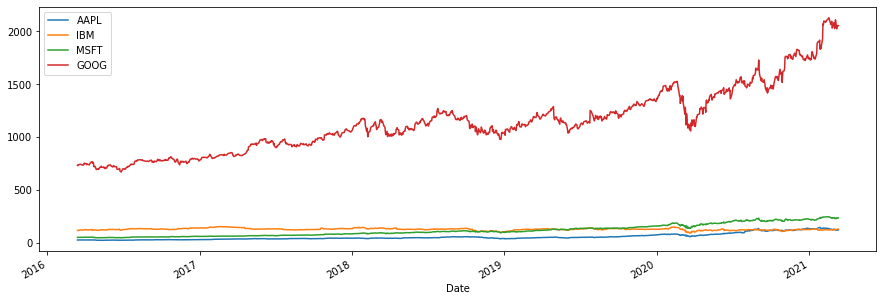

In [82]:
# plotting price dataframe. 
price.plot(figsize=(15,5))

In stock-markets, often one is interested in the _percent changes of the prices_
* % change from previous value

Let us compute it
- Actually, __let us ask Pandas to compute it__ for us!
- Method `pct_change()` does precisely this
  - Computes the percentage change from the immediately previous row by default. 
  - This is useful in comparing the percentage of change in a time series of elements.

In [83]:
returns = price.pct_change() 
returns.tail()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2021-03-05,0.010738,0.022646,0.021479,0.029013
2021-03-08,-0.041674,0.016120,-0.018178,-0.040013
2021-03-09,0.040650,-0.005048,0.028101,0.014095
2021-03-10,-0.009167,0.029715,-0.005817,0.001135
2021-03-12,-0.002459,-0.004630,0.005851,-0.000693


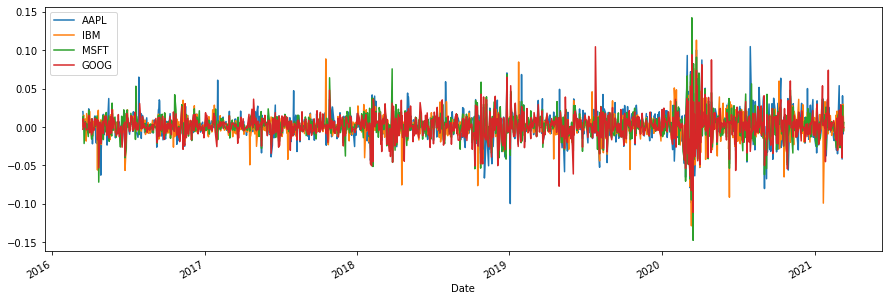

In [84]:
returns.plot(figsize=(15,5))

Can I smooth the data using moving averages/window averages?

In [85]:
returns_smooth=returns.rolling(15).sum()
returns_smooth

,AAPL,IBM,MSFT,GOOG
Date,,,,
2016-03-14,NaN,NaN,NaN,NaN
2016-03-15,NaN,NaN,NaN,NaN
2016-03-16,NaN,NaN,NaN,NaN
2016-03-17,NaN,NaN,NaN,NaN
2016-03-18,NaN,NaN,NaN,NaN
...,...,...,...,...
2021-03-05,-0.103461,0.017362,-0.050099,0.007807
2021-03-08,-0.146910,0.034392,-0.070322,-0.036129
2021-03-09,-0.090157,0.035387,-0.036955,-0.030489


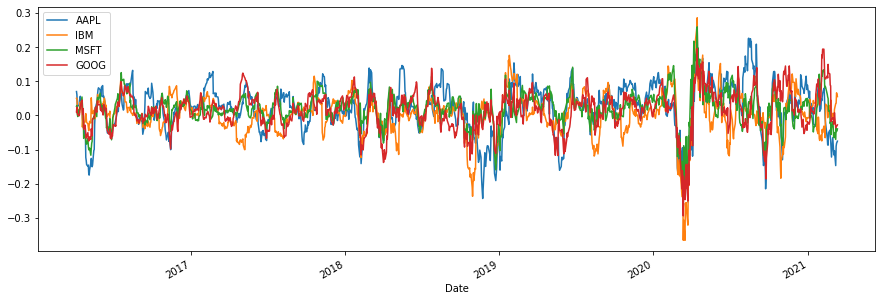

In [86]:
returns_smooth.plot(figsize=(15,5))

DataFrames offer two methods for computing 
* the correlation among the elements in the DataFrame (`corr`)
* the covariance matrix of the DataFrame (`cov`)

In [ ]:
returns

In [87]:
returns.corr()

,AAPL,IBM,MSFT,GOOG
AAPL,1.000000,0.448006,0.711727,0.651120
IBM,0.448006,1.000000,0.534532,0.503463
MSFT,0.711727,0.534532,1.000000,0.778388
GOOG,0.651120,0.503463,0.778388,1.000000


In [88]:
returns.corr().style.background_gradient(cmap='Reds')

,AAPL,IBM,MSFT,GOOG
AAPL,1.000000,0.448006,0.711727,0.651120
IBM,0.448006,1.000000,0.534532,0.503463
MSFT,0.711727,0.534532,1.000000,0.778388
GOOG,0.651120,0.503463,0.778388,1.000000


In [89]:
returns.cov()

,AAPL,IBM,MSFT,GOOG
AAPL,0.000363,0.000140,0.000235,0.000208
IBM,0.000140,0.000269,0.000152,0.000138
MSFT,0.000235,0.000152,0.000300,0.000226
GOOG,0.000208,0.000138,0.000226,0.000280


In [90]:
returns.cov().style.background_gradient(cmap='Reds')

,AAPL,IBM,MSFT,GOOG
AAPL,0.000363,0.000140,0.000235,0.000208
IBM,0.000140,0.000269,0.000152,0.000138
MSFT,0.000235,0.000152,0.000300,0.000226
GOOG,0.000208,0.000138,0.000226,0.000280


# More complex application to Italian COVID data - Advanced Plotting
Pandas offers a number of plotting methods for DataFrame objects

The Italian Civil Protection Department publishes everyday [data on the status of the COVID-19 epidemy in Italy](https://github.com/pcm-dpc/COVID-19)

The repository contains trend data of the COVID'19 pandemic in Italy
- ‘dati-andamento-nazionale’ (national-level), 
- ‘dati-regioni’ (regional-level),
- ‘dati-province’ (province-level) 

In [91]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
#import warnings
#warnings.filterwarnings("ignore")

## Line Plots
Series and DataFrame each have a plot method for making many different types of plots
* By default, they make line plots 

Let's load again the national-level COVID'19 data
- We set the date (`data`) as the index column
- We tell pandas to interpret such column as a datetime type

In [92]:
# load data relating to the national trend of SARS-CoV-2 spread on Pandas DataFrame
url_dpc_nazionale = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv'
covid_italy = pd.read_csv(url_dpc_nazionale, index_col='data')
covid_italy.tail()

,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,...,tamponi,casi_testati,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido
data,,,,,,,,,,,,,,,,,,,,,
2021-03-08T17:00:00,ITA,21831,2700,24531,448002,472533,-329,13902,2508732,100103,...,42527529,20435513.0,NaN,231.0,NaN,NaN,3015474.0,65894.0,36115564.0,6411965.0
2021-03-09T17:00:00,ITA,22393,2756,25149,453734,478883,6350,19749,2521731,100479,...,42873501,20543816.0,NaN,278.0,NaN,NaN,3032381.0,68712.0,36292531.0,6580970.0
2021-03-10T17:00:00,ITA,22882,2827,25709,461365,487074,8191,22409,2535483,100811,...,43234541,20664762.0,NaN,253.0,NaN,NaN,3052141.0,71227.0,36494453.0,6740088.0
2021-03-11T17:00:00,ITA,23247,2859,26106,471244,497350,10276,25673,2550483,101184,...,43606758,20793180.0,NaN,266.0,NaN,NaN,3074409.0,74608.0,36702922.0,6903836.0
2021-03-12T17:00:00,ITA,23656,2914,26570,482747,509317,11967,26824,2564926,101564,...,43976394,20911246.0,NaN,226.0,NaN,NaN,3098594.0,77213.0,36904071.0,7072323.0


In [93]:
print(covid_italy.index)
covid_italy.index = pd.to_datetime(covid_italy.index) # converts 'data' column from object to datatime type
#covid_italy.tail()
print()
print(covid_italy.index)

Index(['2020-02-24T18:00:00', '2020-02-25T18:00:00', '2020-02-26T18:00:00',
       '2020-02-27T18:00:00', '2020-02-28T18:00:00', '2020-02-29T18:00:00',
       '2020-03-01T18:00:00', '2020-03-02T18:00:00', '2020-03-03T18:00:00',
       '2020-03-04T18:00:00',
       ...
       '2021-03-03T17:00:00', '2021-03-04T17:00:00', '2021-03-05T17:00:00',
       '2021-03-06T17:00:00', '2021-03-07T17:00:00', '2021-03-08T17:00:00',
       '2021-03-09T17:00:00', '2021-03-10T17:00:00', '2021-03-11T17:00:00',
       '2021-03-12T17:00:00'],
      dtype='object', name='data', length=383)

DatetimeIndex(['2020-02-24 18:00:00', '2020-02-25 18:00:00',
               '2020-02-26 18:00:00', '2020-02-27 18:00:00',
               '2020-02-28 18:00:00', '2020-02-29 18:00:00',
               '2020-03-01 18:00:00', '2020-03-02 18:00:00',
               '2020-03-03 18:00:00', '2020-03-04 18:00:00',
               ...
               '2021-03-03 17:00:00', '2021-03-04 17:00:00',
               '2021-03-05 17:00:00', '

Let us focucs only on
- currently infected (`totale_positivi`)
- overall recovered (`dimessi_guariti`)
- overall deceased (`deceduti`)

In [94]:
covid_italy_filter = covid_italy[['totale_positivi','dimessi_guariti','deceduti' ]]
covid_italy_filter

,totale_positivi,dimessi_guariti,deceduti
data,,,
2020-02-24 18:00:00,221,1,7
2020-02-25 18:00:00,311,1,10
2020-02-26 18:00:00,385,3,12
2020-02-27 18:00:00,588,45,17
2020-02-28 18:00:00,821,46,21
...,...,...,...
2021-03-08 17:00:00,472533,2508732,100103
2021-03-09 17:00:00,478883,2521731,100479
2021-03-10 17:00:00,487074,2535483,100811


During the peek in Spring 2020, the Italian government made a number of urgent decrees (links in Italian)
- Decree "Zone Rosse"
  - Some areas were classified as _red zones_, i.e. put in lockdown
- Decree ["Io resto a casa"](https://www.agenziacoesione.gov.it/news_istituzionali/emergenza-epidemiologica-covid-19-fine-al-25-marzo-stop-alle-attivita-commerciali-al-dettaglio-in-tutta-italia-dpcm-11-marzo-2020/)
  - Only the _necessary_ industrial and commercial production activities were left open nation-wide
  - Not movements outside the city of residence
- Decree ["Chiudi Italia"](http://www.governo.it/it/articolo/coronavirus-firmato-il-dpcm-22-marzo-2020/14363)
  - Hard lockdown nation-wide
- Decree ["Fase 2"](http://www.salute.gov.it/portale/news/p3_2_1_1_1.jsp?lingua=italiano&menu=notizie&p=dalministero&id=4763)
  - Partial re-opening
  
Let us look at **how were the numbers at that time**

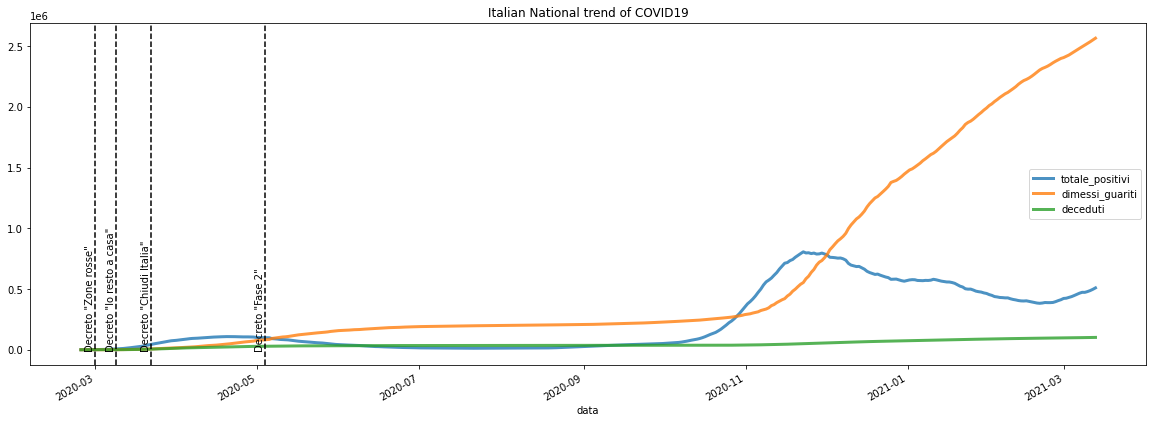

In [95]:
from datetime import datetime

# We now create the plot
covid_italy_filter.plot(figsize=(20, 7), linewidth=3, alpha=0.8, title="Italian National trend of COVID19") 

# and add annotations
annotations = {datetime(2020, 3, 1) :'Decreto "Zone rosse"',
               datetime(2020, 3, 9) :'Decreto "Io resto a casa"',
               datetime(2020, 3, 22):'Decreto "Chiudi Italia"',
               datetime(2020, 5, 4) :'Decreto "Fase 2"'}
 
for d,a in annotations.items():
    plt.annotate(a,(d, 0), rotation=90, horizontalalignment='right')
    plt.axvline(d, color='k', linestyle='--')   
    
plt.show()

We have too many data points 
- making it difficult to focus on the 4 dates of interest

Let's hide some
- using `iloc` to consider the first 100 rows
- using `loc` to consider the rows with date before June
- using `drop` to drop the rows from June onward

But first, let's create a function to add annotations to the _current_ plot

In [97]:
def add_annotations():
    # and add annotations
    annotations = {datetime(2020, 3, 1) :'Decreto "Zone rosse"',
                   datetime(2020, 3, 9) :'Decreto "Io resto a casa"',
                   datetime(2020, 3, 22):'Decreto "Chiudi Italia"',
                   datetime(2020, 5, 4) :'Decreto "Fase 2"'}
 
    for d,a in annotations.items():
        plt.annotate(a,(d, 0), rotation=90, horizontalalignment='right')
        plt.axvline(d, color='k', linestyle='--')   

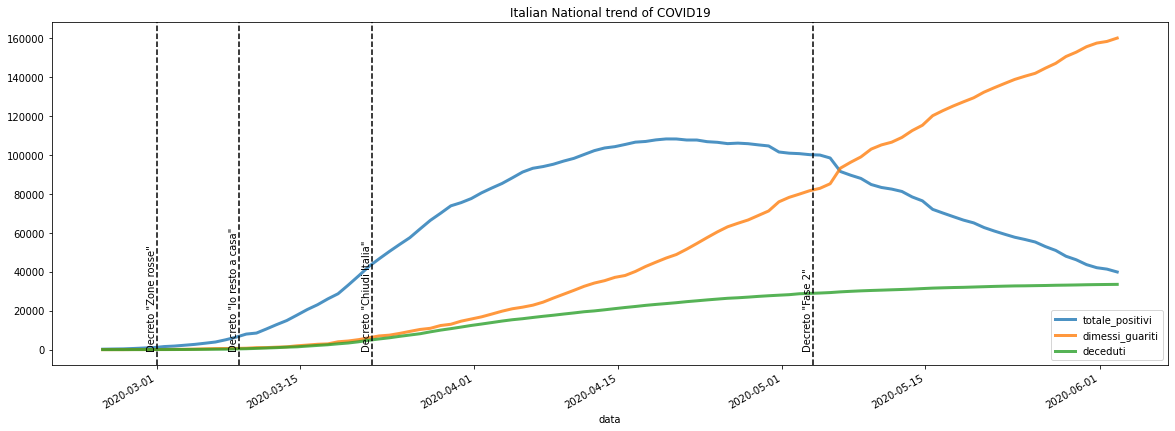

In [98]:
covid_italy_filter.iloc[:100].plot(figsize=(20, 7), linewidth=3, alpha=0.8, title="Italian National trend of COVID19") 
add_annotations() 
plt.show()

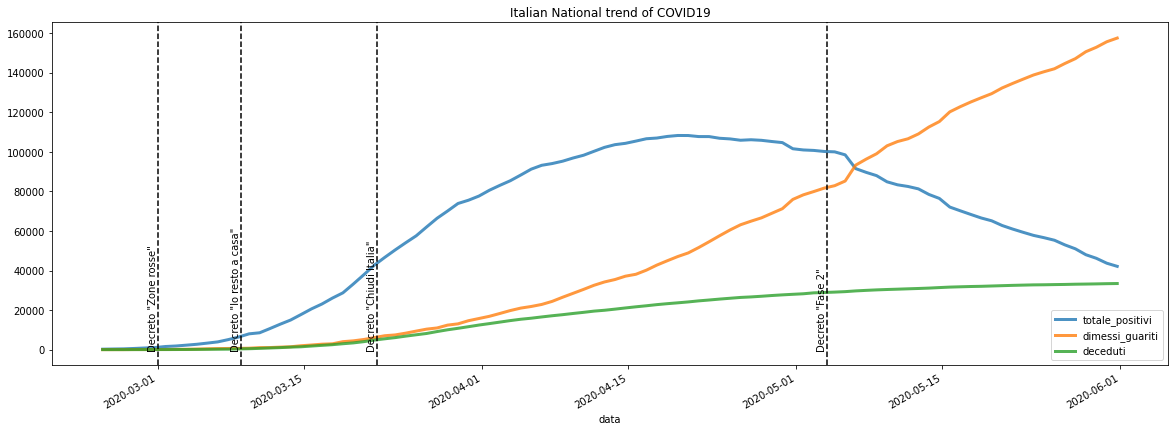

In [99]:
covid_italy_filter.loc[covid_italy_filter.index<= datetime(2020, 6, 1)].plot(figsize=(20, 7), linewidth=3, alpha=0.8, title="Italian National trend of COVID19") 
add_annotations()     
plt.show()

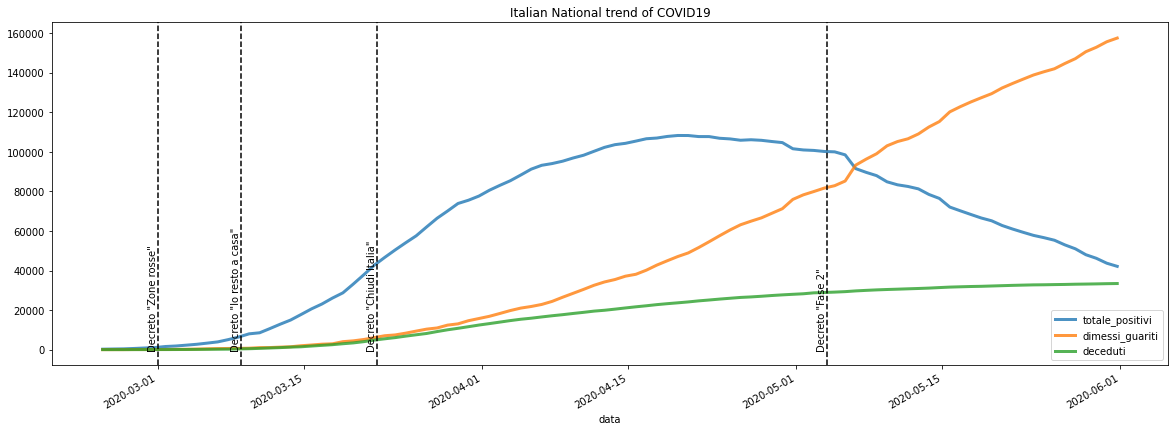

In [100]:
covid_italy_filter.drop(covid_italy_filter[covid_italy_filter.index > datetime(2020, 6, 1)].index).plot(figsize=(20, 7), linewidth=3, alpha=0.8, title="Italian National trend of COVID19") 
add_annotations()     
plt.show()

## Bar Plots
Making bar plots instead of line plots is as simple as passing 
* `kind='bar'` (for vertical bars) or 
* `kind='barh'` (for horizontal bars).

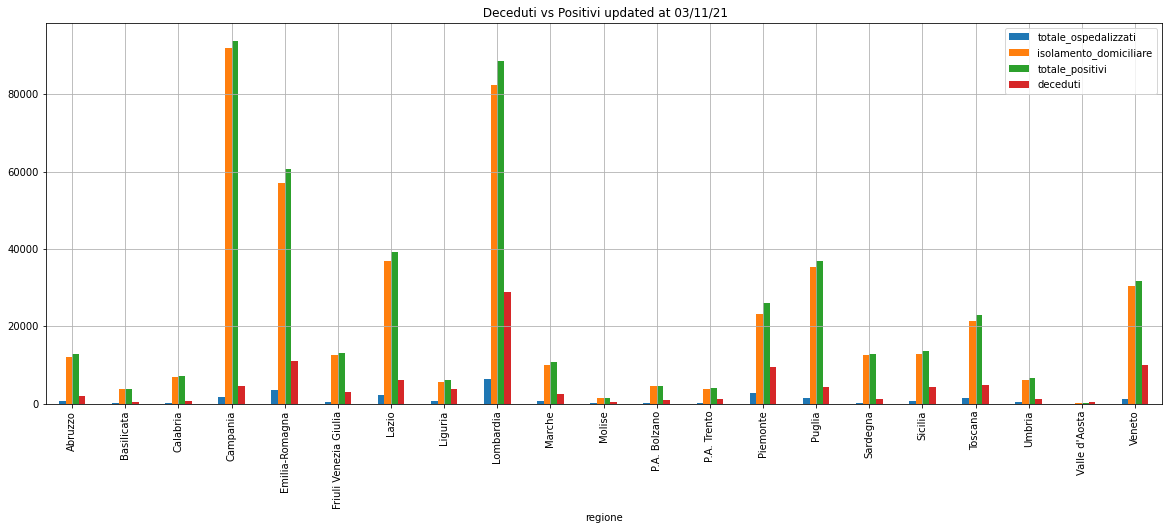

In [10]:
# load data relating to the regional trend of SARS-CoV-2 spread
url_dpc_regioni = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv'
covid_regions = pd.read_csv(url_dpc_regioni)
covid_regions.index = pd.to_datetime(covid_regions.data)
covid_regions = covid_regions.rename(columns={'denominazione_regione': 'regione'})

# get last day data
cov_regions_last_day = covid_regions[covid_regions.data ==  covid_regions.data.iloc[-1]] # get last day data
cov_regions_last_day.index = cov_regions_last_day.regione # set Region as index

#drop some unnecessary columns
cov_regions_last_day = cov_regions_last_day.drop(['lat','long','codice_regione',"stato","regione","note"], axis = 1)

#Let's get the data of interest (Deceduti vs Positivi) and plot them
title = f" Deceduti vs Positivi updated at {covid_regions.index[-1].strftime('%D')}"
#Here we are using 'bar!'
cov_regions_last_day[['totale_ospedalizzati','isolamento_domiciliare','totale_positivi','deceduti']].plot(kind='bar', figsize =(20,7),grid=True,title=title)

plt.show()

### Stacked bar plots
Stacked bar plots are created from a DataFrame by passing `stacked=True`, 
- resulting in the value in each row being stacked together

Let's compare 'terapia_intensiva' and 'totale_ospedalizzati' on latest day

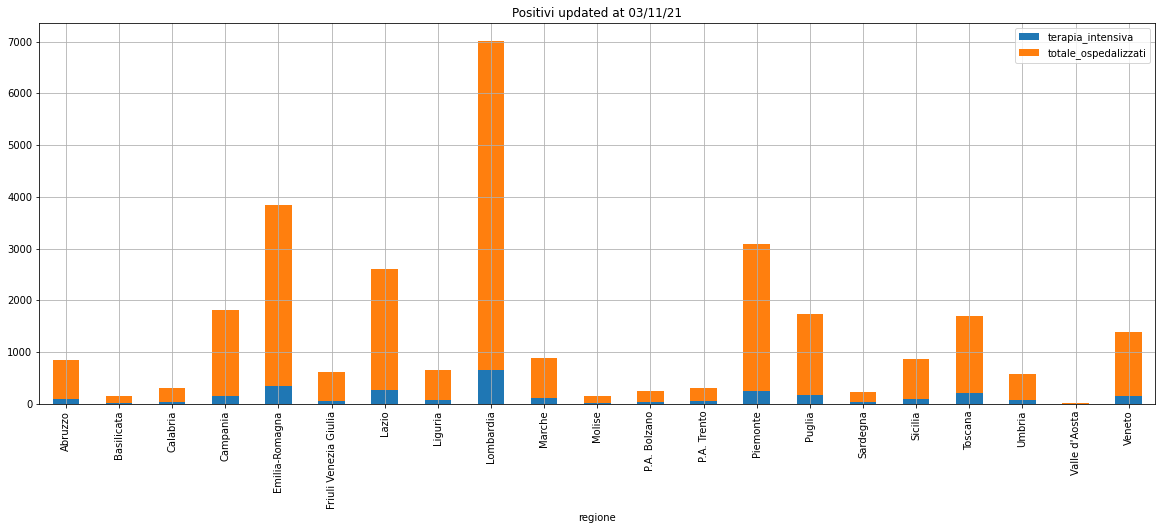

In [11]:
title = f"Positivi updated at {covid_regions.index[-1].strftime('%D')}"
cov_regions_last_day[['terapia_intensiva','totale_ospedalizzati']].plot(kind='bar', stacked=True, figsize =(20,7),grid=True,title=title)
plt.show()

## Scatter Matrix 
In exploratory data analysis it is helpful to look at how pairs of variables relate to each other
* we are interested in _plots relating pairs of variables_
* this is known as a _pairs plot_ or _scatter plot matrix_. 

Making such a plot from scratch requires a bit of work. 
* Luckily pandas has a `scatter_matrix` function for creating one from a DataFrame. 
* It also supports placing histograms or density plots of each variable along the diagonal.

In [101]:
covid_italy = pd.read_csv(url_dpc_nazionale, index_col='data')
covid_italy.index = pd.to_datetime(covid_italy.index) # converts 'data' column from object to datatime type
covid_italy.tail()

,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,...,tamponi,casi_testati,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido
data,,,,,,,,,,,,,,,,,,,,,
2021-03-08 17:00:00,ITA,21831,2700,24531,448002,472533,-329,13902,2508732,100103,...,42527529,20435513.0,NaN,231.0,NaN,NaN,3015474.0,65894.0,36115564.0,6411965.0
2021-03-09 17:00:00,ITA,22393,2756,25149,453734,478883,6350,19749,2521731,100479,...,42873501,20543816.0,NaN,278.0,NaN,NaN,3032381.0,68712.0,36292531.0,6580970.0
2021-03-10 17:00:00,ITA,22882,2827,25709,461365,487074,8191,22409,2535483,100811,...,43234541,20664762.0,NaN,253.0,NaN,NaN,3052141.0,71227.0,36494453.0,6740088.0
2021-03-11 17:00:00,ITA,23247,2859,26106,471244,497350,10276,25673,2550483,101184,...,43606758,20793180.0,NaN,266.0,NaN,NaN,3074409.0,74608.0,36702922.0,6903836.0
2021-03-12 17:00:00,ITA,23656,2914,26570,482747,509317,11967,26824,2564926,101564,...,43976394,20911246.0,NaN,226.0,NaN,NaN,3098594.0,77213.0,36904071.0,7072323.0


In [102]:
#drop unnecessary columns
covid_italy.drop(columns=["note_test","note_casi"], inplace=True)

In [103]:
covid_italy['totale_casi']

data
2020-02-24 18:00:00        229
2020-02-25 18:00:00        322
2020-02-26 18:00:00        400
2020-02-27 18:00:00        650
2020-02-28 18:00:00        888
                        ...   
2021-03-08 17:00:00    3081368
2021-03-09 17:00:00    3101093
2021-03-10 17:00:00    3123368
2021-03-11 17:00:00    3149017
2021-03-12 17:00:00    3175807
Name: totale_casi, Length: 383, dtype: int64

In [15]:
covid_italy['terapia_intensiva']

data
2020-02-24 18:00:00      26
2020-02-25 18:00:00      35
2020-02-26 18:00:00      36
2020-02-27 18:00:00      56
2020-02-28 18:00:00      64
                       ... 
2021-03-07 17:00:00    2605
2021-03-08 17:00:00    2700
2021-03-09 17:00:00    2756
2021-03-10 17:00:00    2827
2021-03-11 17:00:00    2859
Name: terapia_intensiva, Length: 382, dtype: int64

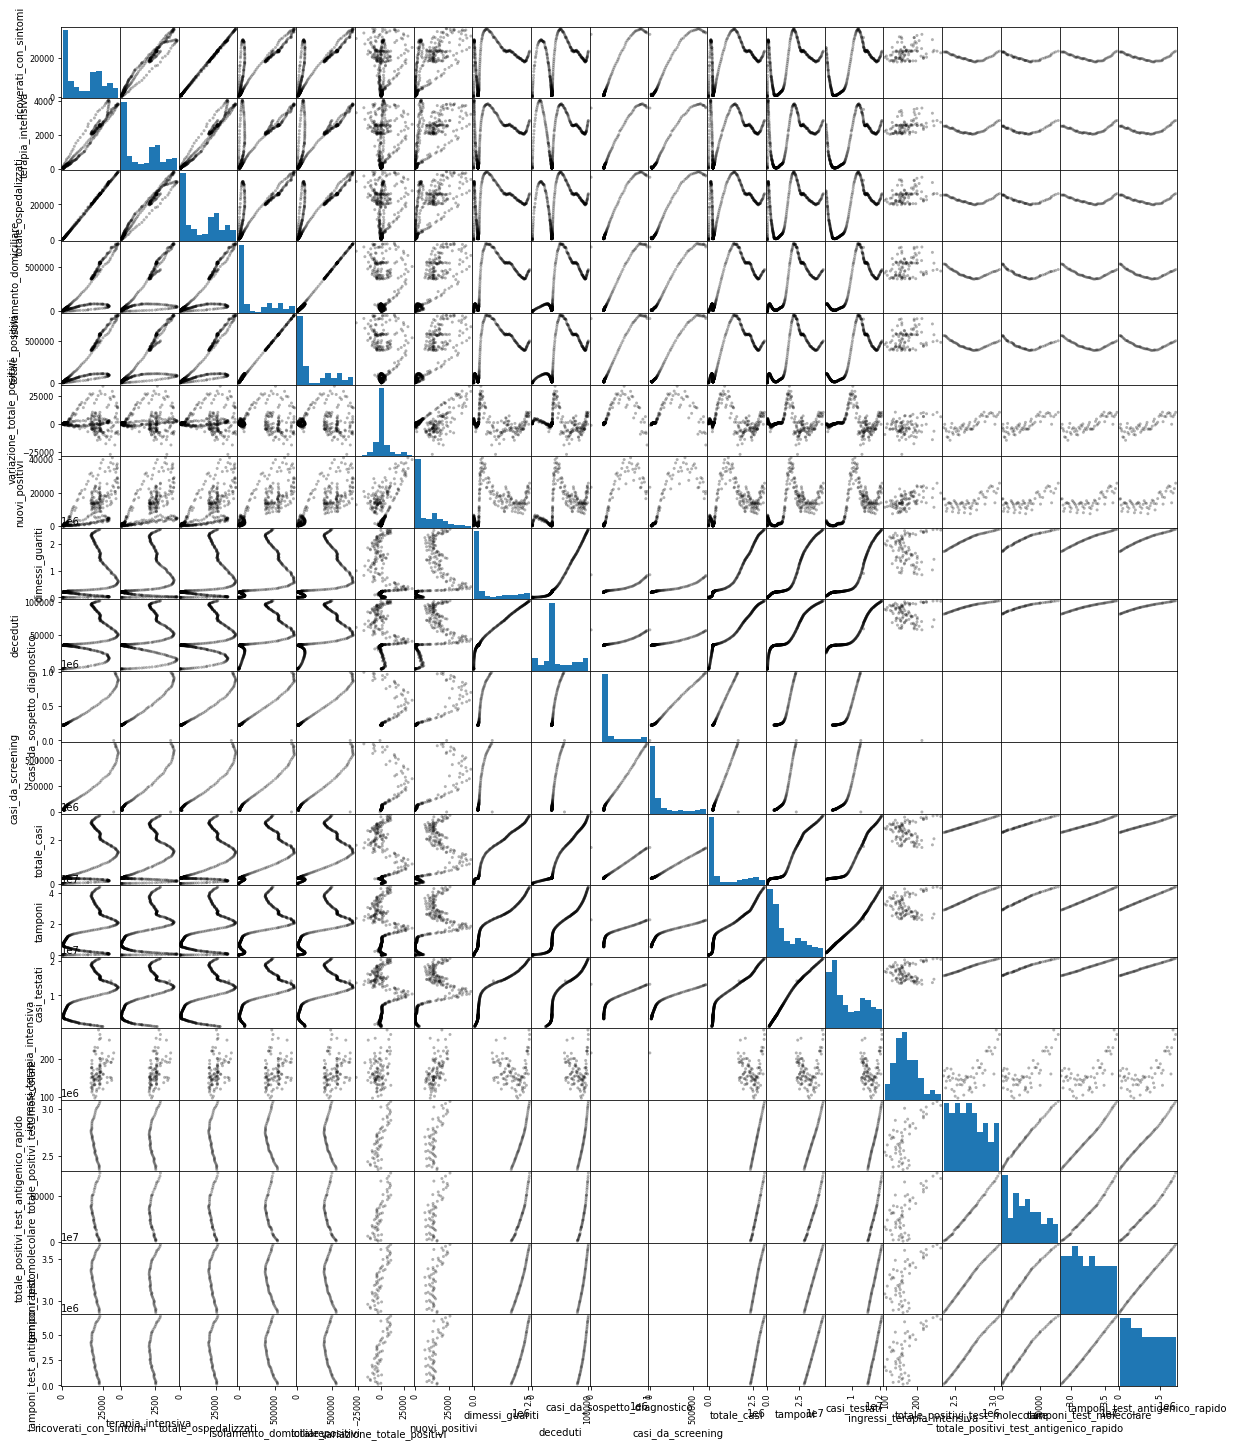

In [16]:
pd.plotting.scatter_matrix(covid_italy,figsize =(20,25),  color='k', alpha=0.3)
plt.show()

Too much data here!
- let's remove some more mostly empty rows

In [17]:
covid_italy[["totale_positivi_test_molecolare","totale_positivi_test_antigenico_rapido","tamponi_test_molecolare","tamponi_test_antigenico_rapido"]]

,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido
data,,,,
2020-02-24 18:00:00,NaN,NaN,NaN,NaN
2020-02-25 18:00:00,NaN,NaN,NaN,NaN
2020-02-26 18:00:00,NaN,NaN,NaN,NaN
2020-02-27 18:00:00,NaN,NaN,NaN,NaN
2020-02-28 18:00:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2021-03-07 17:00:00,3002580.0,64906.0,36013136.0,6329709.0
2021-03-08 17:00:00,3015474.0,65894.0,36115564.0,6411965.0
2021-03-09 17:00:00,3032381.0,68712.0,36292531.0,6580970.0


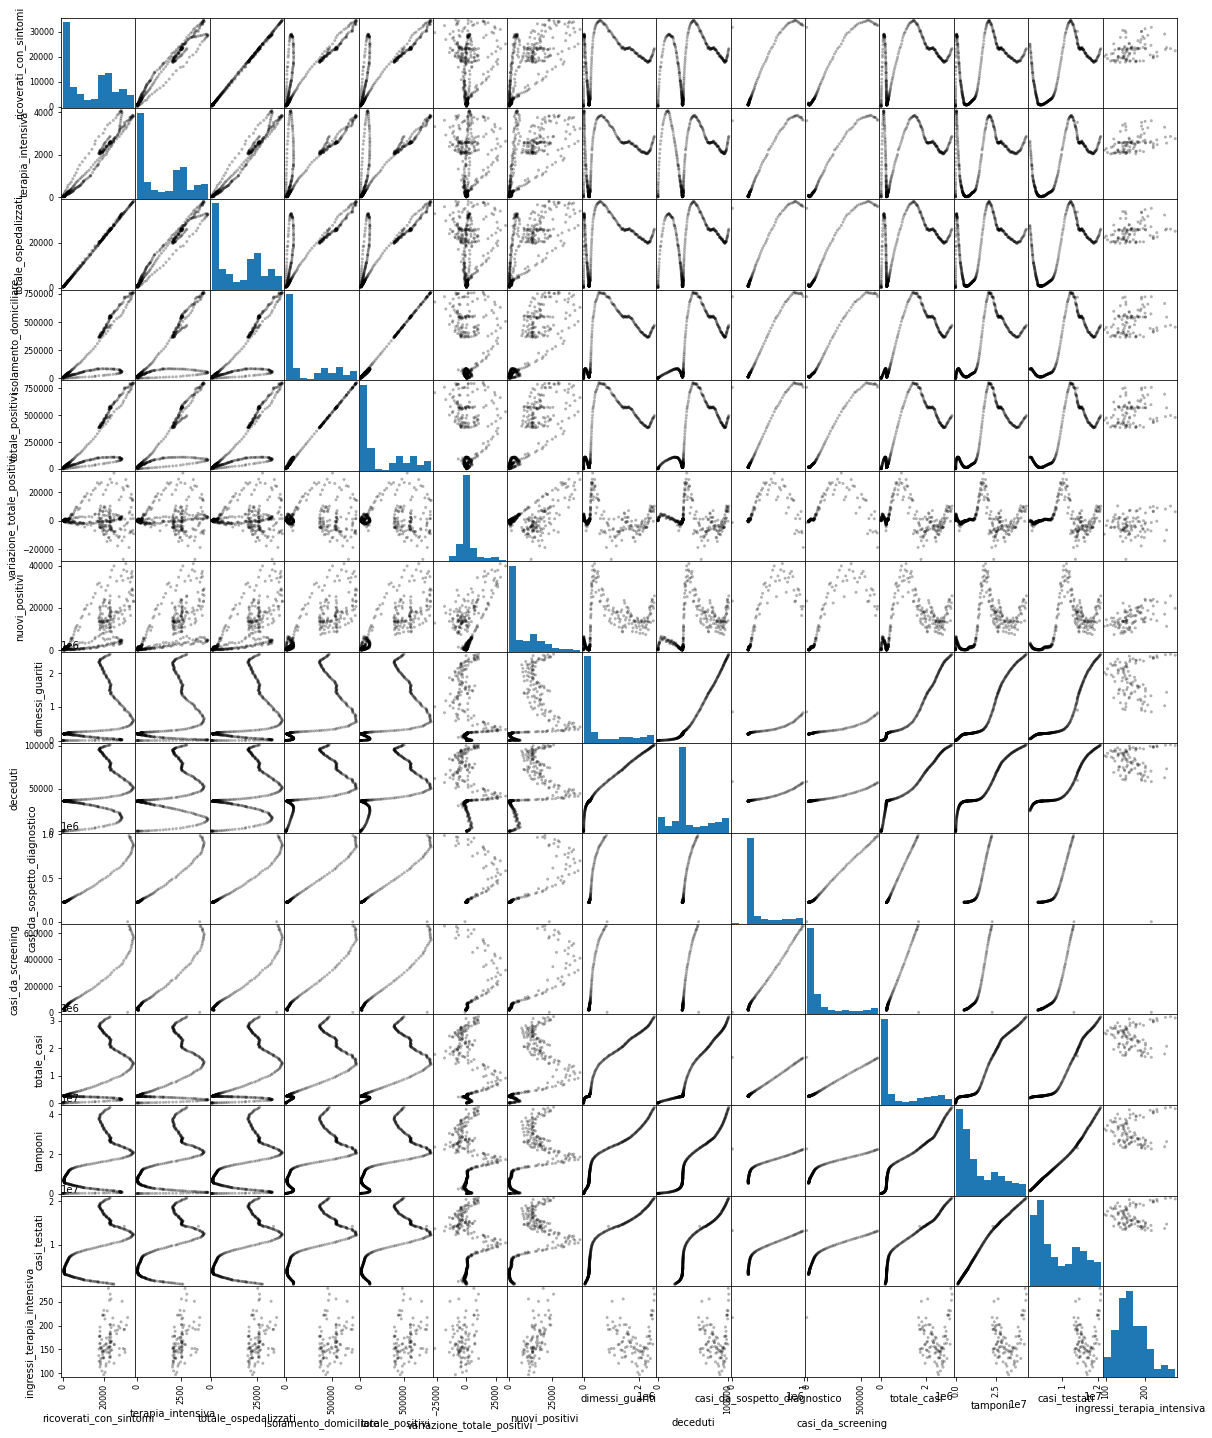

In [18]:
covid_italy.drop(columns=["totale_positivi_test_molecolare","totale_positivi_test_antigenico_rapido","tamponi_test_molecolare","tamponi_test_antigenico_rapido"], inplace=True)
pd.plotting.scatter_matrix(covid_italy,figsize =(20,25),  color='k', alpha=0.3)
plt.show()